# Background / Latar Belakang

AWS (Amazon Web Service) adalah layanan Komputasi Awan (Cloud Computing) dari perusahaan Amazon. AWS merupakan salah satu pilihan utama untuk komputasi awan dengan serangkaian keunggulan dan fitur. Amazon Web Services (AWS) adalah platform awan yang paling komprehensif di dunia, menawarkan lebih dari 200 layanan yang lengkap dari pusat data di seluruh dunia. Hal ini banyak diadopsi oleh jutaan pelanggan, termasuk startup, perusahaan besar, dan lembaga pemerintah terkemuka. 

SaaS (Software as a Service) di AWS mengacu pada model layanan di mana perangkat lunak disediakan dan diakses melalui internet. Dalam konteks AWS, SaaS bisa berarti aplikasi perangkat lunak yang di-host dan dijalankan di infrastruktur AWS, yang kemudian diakses oleh pengguna melalui web browser. AWS menyediakan berbagai layanan yang mendukung pengembangan, penyebaran, dan pengelolaan aplikasi SaaS, termasuk Amazon Elastic Compute Cloud (EC2) untuk menjalankan aplikasi, Amazon Relational Database Service (RDS) untuk menyimpan data, dan Amazon Simple Storage Service (S3) untuk penyimpanan objek. Dengan menggunakan layanan AWS, perusahaan dapat membangun dan mengoperasikan aplikasi SaaS mereka dengan skalabilitas, keandalan, dan keamanan yang tinggi.

dikutip dari  artikel yang ditulis oleh [Felix Richter](https://www.statista.com/chart/18819/worldwide-market-share-of-leading-cloud-infrastructure-service-providers/)  menurut perkiraan dari Synergy Research Group, pangsa pasar Amazon dalam pasar global Infrastruktur Cloud mencapai 31 persen pada kuartal keempat tahun 2023, turun dari 33 persen setahun sebelumnya. 


Dengan adanya artikel tersebut, sebagai seorang Analis Data, kita dapat mengidentifikasi pola dan tren dalam volume penjualan. Selain itu, kita juga dapat mengeksplorasi perilaku pembelian perusahaan hal ini termasuk  distribusi geografis pelanggan, produk yang disukai dan lain sebagainya. 

# Problem Statement

SaaS (Software as a Service) sales adalah penjualan perangkat lunak sebagai layanan. Dalam konteks AWS, ini mengacu pada penjualan produk perangkat lunak yang diakses dan digunakan secara berlangganan melalui internet, tanpa perlu menginstal perangkat lunak secara fisik di perangkat pengguna. Dalam hal ini, perusahaan AWS menjual perangkat lunak penjualan dan pemasaran kepada perusahaan lain (B2B) dalam bentuk layanan yang dapat diakses secara online.

kali ini akan mencari faktor-faktor yang menyumbang pada profitabilitas negatif dalam penjualan produk SaaS di AWS, terutama dalam konteks produk yang menghasilkan keuntungan negatif. Tujuan dari analisis ini adalah untuk mengidentifikasi variabel-variabel yang mungkin mempengaruhi profitabilitas negatif berdasarkan kinerja penjualan, segmen pelanggan, dan pasar perusahaan. Sebagai seorang analis data, kita akan mencoba menjawab pertanyaan atas masalah **faktor apa saja yang berkontribusi terhadap penurunan profit dalam penjualan SaaS di AWS, dan bagaimana  mengoptimalisasi produk yang memiliki profibilitas kurang baik dalam penjualan, dengan bedasarkan analisis terhapada sales performance, pasar perusahaan , dan segmentasi pelanggan.**

dari masalah diatas , maka akan diuji analisis menggunakan 2 cara analisis. 
1. **Analisis kinerja penjualan perusahaan.** menganalisis faktor yang mempengaruhi penjualan dan keuntungan. terlebih untuk keuntungan negatif.hal ini akan diuji salah satu caranya dengan faktor dari pemberian diskon.

2. **Analisis segmentasi perusahaan.** identifikasi performansi wilayah atau subwilayah , dan analisis segmentasi pembelian produk di berbagai industri.

# Goal / Tujuan

Tujuan dari analisis ini untuk mengetahui faktor apa saja yang berkontribusi terhadap profit yang negatif sehingga mempengaruhi trend dari penjualan produk AWS. faktor ini akan dilakukan dengan 2 cara analisis yang diharapkan akan membuat Perusahaan Amazon khususnya di AWS agar bisa mendapatkan masukan / insight sehingga dari sisi perusahaan bisa mengambil keputusan yang tepat agar dapat meningkatkan kembali penjualan dan profitabilitasnya dan pada ujungnya diharapkan tetap mempertahankan posisinya sebagai leader di dunia web service. 

# Import Libraries

In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Understanding

## Data Overall

In [88]:
# Melihat keseluruhan data

df = pd.read_csv('SaaS-Sales.csv')
df = df.drop(columns=['Row ID','Date Key'])
display(df.head())
display(df.tail())

,Order ID,Order Date,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
0,EMEA-2022-152156,11/9/2022,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,Marketing Suite,16GRM07R1K,261.9600,2,0.00,41.9136
1,EMEA-2022-152156,11/9/2022,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,FinanceHub,QLIW57KZUV,731.9400,3,0.00,219.5820
2,AMER-2022-138688,6/13/2022,Deirdre Bailey,United States,New York City,AMER,NAMER,Phillips 66,1056,Energy,Strategic,FinanceHub,JI6BVL70HQ,14.6200,2,0.00,6.8714
3,EMEA-2021-108966,10/11/2021,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,ContactMatcher,DE9GJKGD44,957.5775,5,0.45,-383.0310
4,EMEA-2021-108966,10/11/2021,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,Marketing Suite - Gold,OIF7NY23WD,22.3680,2,0.20,2.5164


,Order ID,Order Date,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
9989,EMEA-2020-110422,1/22/2020,Dan Allan,Germany,Hamburg,EMEA,EU-WEST,Johnson & Johnson,1055,Healthcare,SMB,SaaS Connector Pack,ETHXMB5TMD,25.248,3,0.2,4.1028
9990,AMER-2023-121258,2/27/2023,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,SaaS Connector Pack,LYHOKTRY7L,91.960,2,0.0,15.6332
9991,AMER-2023-121258,2/27/2023,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,Site Analytics,I5SVMI6M88,258.576,2,0.2,19.3932
9992,AMER-2023-121258,2/27/2023,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,Support,JHLW4P6LQ2,29.600,4,0.0,13.3200
9993,AMER-2023-119914,5/5/2023,Jasmine Springer,United States,Dallas,AMER,NAMER,Comcast,1022,Communications,SMB,OneView,3NTBV9B3PS,243.160,2,0.0,72.9480


Nama Kolom : 

1. Order Date: Tanggal saat pesanan ditempatkan.
2. Date Key: Representasi numerik dari tanggal pesanan (YYYYMMDD).
3. Contact Name: Nama orang yang melakukan pesanan.
4. Country: Negara tempat pesanan ditempatkan.
5. City: Kota tempat pesanan ditempatkan.
6. Region: Wilayah tempat pesanan ditempatkan.
7. Subregion: Subwilayah tempat pesanan ditempatkan.
8. Customer: Nama perusahaan yang melakukan pesanan.
9. Customer ID: Identifikasi unik untuk setiap pelanggan.
10. Industry: Industri yang pelanggan miliki.
11. Segment: Segmen pelanggan (SMB, Strategis, Enterprise, dll.).
12. Product: Produk yang dipesan.
13. License: Kunci lisensi untuk produk tersebut.
14. Sales: Jumlah penjualan total untuk transaksi.
15. Quantity: Jumlah total barang dalam transaksi.
16. Discount: Diskon yang diterapkan pada transaksi.
17. Profit: Keuntungan dari transaksi.


untuk kedua data dibawah ini telah dilakukan drop kolom, karena kedua kolom ini merupakan variabel diskrit yang tidak digunakan menjadi bahan analisa : 
1. Row ID: Sebuah identifikasi unik untuk setiap transaksi.
2. Order ID: Sebuah identifikasi unik untuk setiap pesanan.

## Data Types

In [89]:
# Melihat tipe data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Order ID      9994 non-null   object 
 1   Order Date    9994 non-null   object 
 2   Contact Name  9994 non-null   object 
 3   Country       9994 non-null   object 
 4   City          9994 non-null   object 
 5   Region        9994 non-null   object 
 6   Subregion     9994 non-null   object 
 7   Customer      9994 non-null   object 
 8   Customer ID   9994 non-null   int64  
 9   Industry      9994 non-null   object 
 10  Segment       9994 non-null   object 
 11  Product       9994 non-null   object 
 12  License       9994 non-null   object 
 13  Sales         9994 non-null   float64
 14  Quantity      9994 non-null   int64  
 15  Discount      9994 non-null   float64
 16  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(12)
memory usage: 1.3+ MB


Dari semua variabel tersebut ada satu variabel yang tipe data nya masih salah, yaitu Order Date seharusnya berupa datetime year. sehingga dilakukan pengubahan tipe data sebagai berikut: 

In [90]:

df['Order Date'] = pd.to_datetime(df['Order Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Order ID      9994 non-null   object        
 1   Order Date    9994 non-null   datetime64[ns]
 2   Contact Name  9994 non-null   object        
 3   Country       9994 non-null   object        
 4   City          9994 non-null   object        
 5   Region        9994 non-null   object        
 6   Subregion     9994 non-null   object        
 7   Customer      9994 non-null   object        
 8   Customer ID   9994 non-null   int64         
 9   Industry      9994 non-null   object        
 10  Segment       9994 non-null   object        
 11  Product       9994 non-null   object        
 12  License       9994 non-null   object        
 13  Sales         9994 non-null   float64       
 14  Quantity      9994 non-null   int64         
 15  Discount      9994 non-null   float64 

## Missing Values

In [91]:
df.isna().sum().sort_values(ascending = False)

Order ID        0
Industry        0
Discount        0
Quantity        0
Sales           0
License         0
Product         0
Segment         0
Customer ID     0
Order Date      0
Customer        0
Subregion       0
Region          0
City            0
Country         0
Contact Name    0
Profit          0
dtype: int64

#### Matrik Visualisasi


<Axes: >

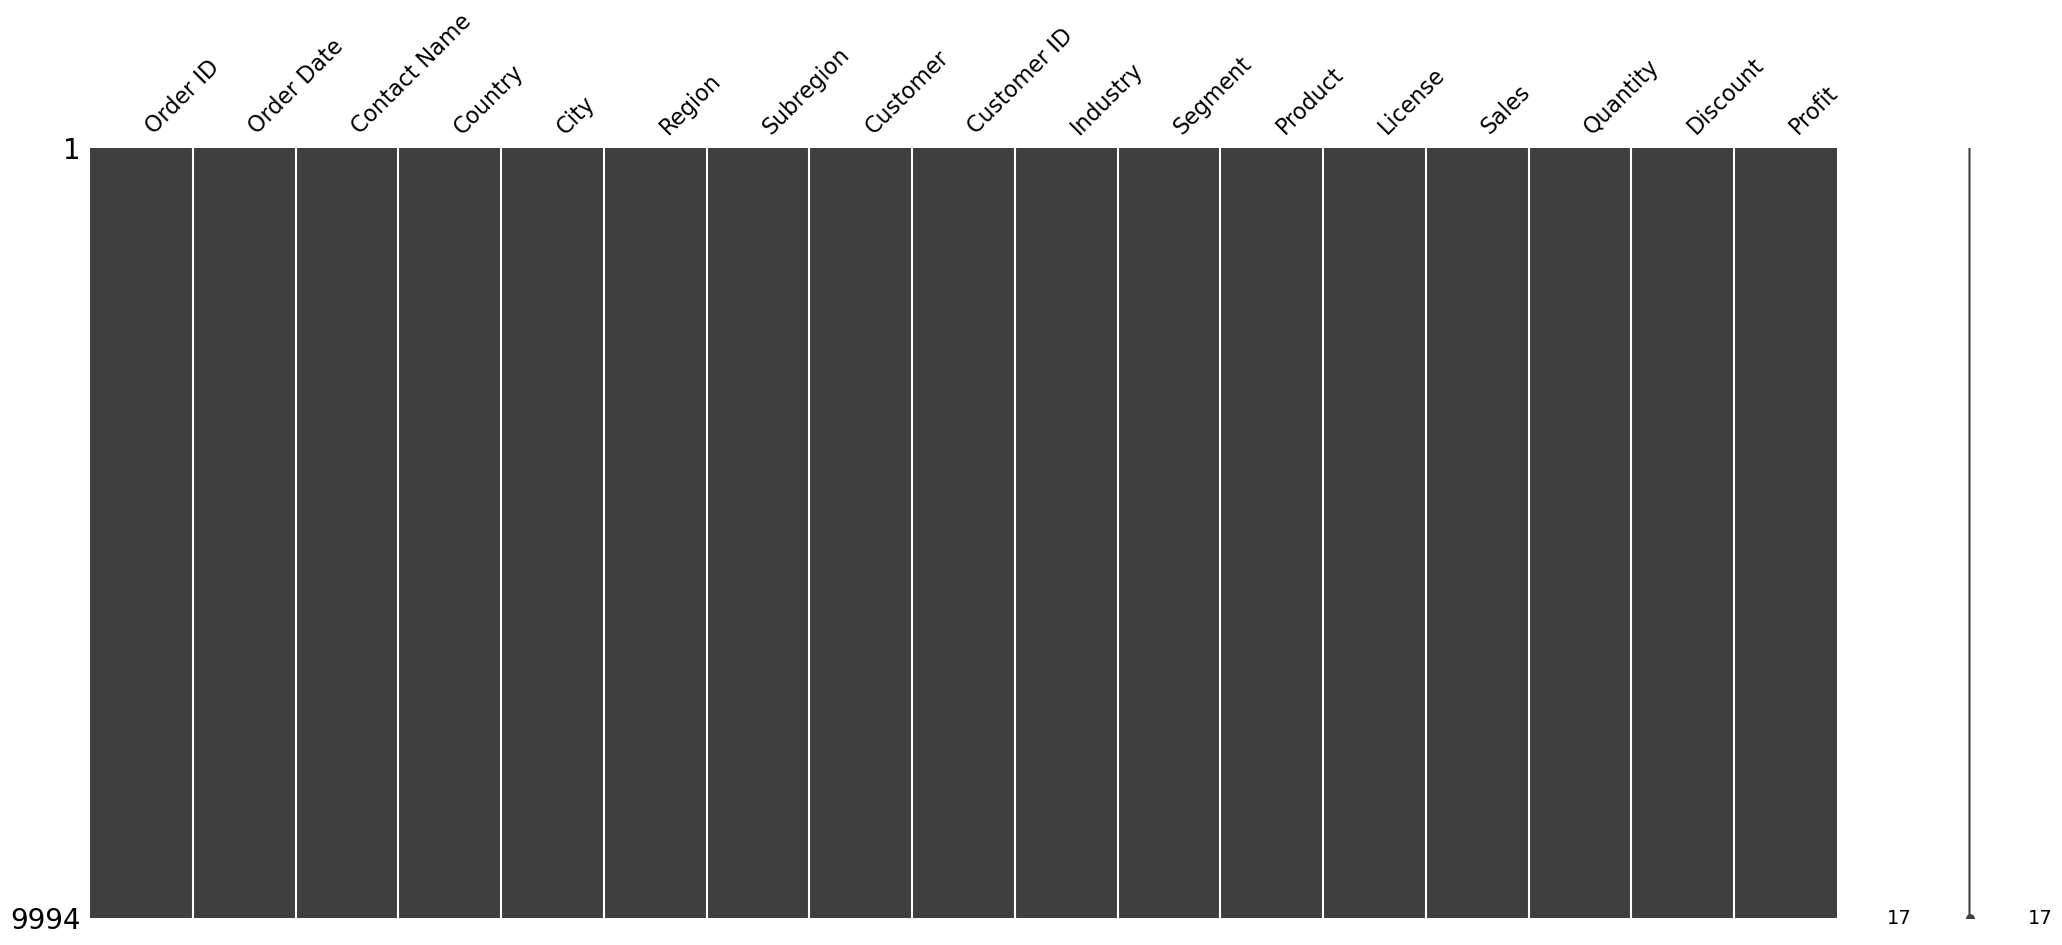

In [92]:
import missingno
missingno.matrix(df)

#### Keterangan Missing Values
dalam Matriks Visualisasi diatas tidak ada missing values dalam DataFrame, sehingga matriks yang dihasilkan menampilkan semua sel berwarna hitam, menandakan bahwa tidak ada missing values yang terdeteksi. 

## Numerik

In [93]:
numerik = df.select_dtypes(include='number')


### Statistika Deskriptif

In [94]:

df.describe()

,Order Date,Customer ID,Sales,Quantity,Discount,Profit
count,9994,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,2022-05-01 00:07:12.259355648,1049.771963,229.858001,3.789574,0.156203,28.656896
min,2020-01-04 00:00:00,1001.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2021-05-23 00:00:00,1024.000000,17.280000,2.000000,0.000000,1.728750
50%,2022-06-27 00:00:00,1049.000000,54.490000,3.000000,0.200000,8.666500
75%,2023-05-15 00:00:00,1076.000000,209.940000,5.000000,0.200000,29.364000
max,2023-12-31 00:00:00,1101.000000,22638.480000,14.000000,0.800000,8399.976000
std,NaN,29.719388,623.245101,2.225110,0.206452,234.260108


#### penjelasan misal lihat minimal maximal (range) dikaitkan dengan mean dan mediannya untuk melihat asumsi distribusi nya
Berikut adalah penjelasan statistik deskriptif untuk data diatas adalah:

* Count (Jumlah):
Count menunjukkan jumlah observasi atau entri dalam setiap kolom. Misalnya, dalam kolom "Row ID" dan "Customer ID", terdapat 9994 entri.

* Mean (Rata-rata):
Rata-rata adalah nilai tengah dari sebuah distribusi data. Misalnya, rata-rata penjualan (Sales) adalah 229.858001, yang berarti rata-rata penjualan setiap transaksi adalah sekitar 229.86.

* Min (Minimum):
Minimum adalah nilai terkecil dalam sebuah kolom. Misalnya, nilai penjualan terendah adalah $0.444.

* 25%, 50%, 75% (Kuartil):
Kuartil merupakan titik-titik pada distribusi yang membagi data menjadi empat bagian yang sama besar. Kuartil ke-25 (25%) adalah nilai di mana 25% data berada di bawahnya, kuartil ke-50 (50%) adalah median (nilai tengah), dan kuartil ke-75 (75%) adalah nilai di mana 75% data berada di bawahnya. Misalnya, kuartil ke-25 untuk penjualan adalah 17.28, yang berarti 25% dari penjualan memiliki nilai di bawah 17.28.

* Max (Maksimum):
Maksimum adalah nilai terbesar dalam sebuah kolom. Misalnya, nilai penjualan tertinggi adalah $22638.48.

* Std (Standar Deviasi):
Standar deviasi mengukur seberapa tersebarnya nilai-nilai dalam sebuah distribusi dari rata-rata. Nilai standar deviasi yang tinggi menunjukkan bahwa data lebih tersebar dari rata-rata, sedangkan nilai yang rendah menunjukkan sebaliknya. Misalnya, standar deviasi penjualan adalah sekitar 623.25, yang menunjukkan bahwa nilai penjualan cenderung bervariasi sekitar 623.25 dari rata-ratanya.


catatan: bahwa dalam kolom "Order Date" tidak ada nilai untuk mean, std, min, 25%, 50%, atau 75% karena kolom tersebut berisi tanggal yang dianggap sebagai data kategorikal, bukan data numerik.

kesimpulan : dilihat dari Mean dan Median: Jika kita membandingkan mean dan median untuk setiap variabel numerik, kita dapat melihat bahwa mean dan median memiliki perbedaan yang cukup signifikan, terutama untuk variabel Sales, Quantity, dan Profit. Ini menunjukkan bahwa distribusi data mungkin tidak simetris. untuk selanjutnya akan dibuat distribusi data.





### Distribusi Data

#### Menggambarkan Histogram

C:\Users\DELL\AppData\Local\Temp\ipykernel_8128\1967359239.py:9: UserWarning: The figure layout has changed to tight
  fig.tight_layout() # agar tidak tumpang tindih
C:\Users\DELL\AppData\Local\Temp\ipykernel_8128\1967359239.py:9: UserWarning: The figure layout has changed to tight
  fig.tight_layout() # agar tidak tumpang tindih
C:\Users\DELL\AppData\Local\Temp\ipykernel_8128\1967359239.py:9: UserWarning: The figure layout has changed to tight
  fig.tight_layout() # agar tidak tumpang tindih
C:\Users\DELL\AppData\Local\Temp\ipykernel_8128\1967359239.py:9: UserWarning: The figure layout has changed to tight
  fig.tight_layout() # agar tidak tumpang tindih


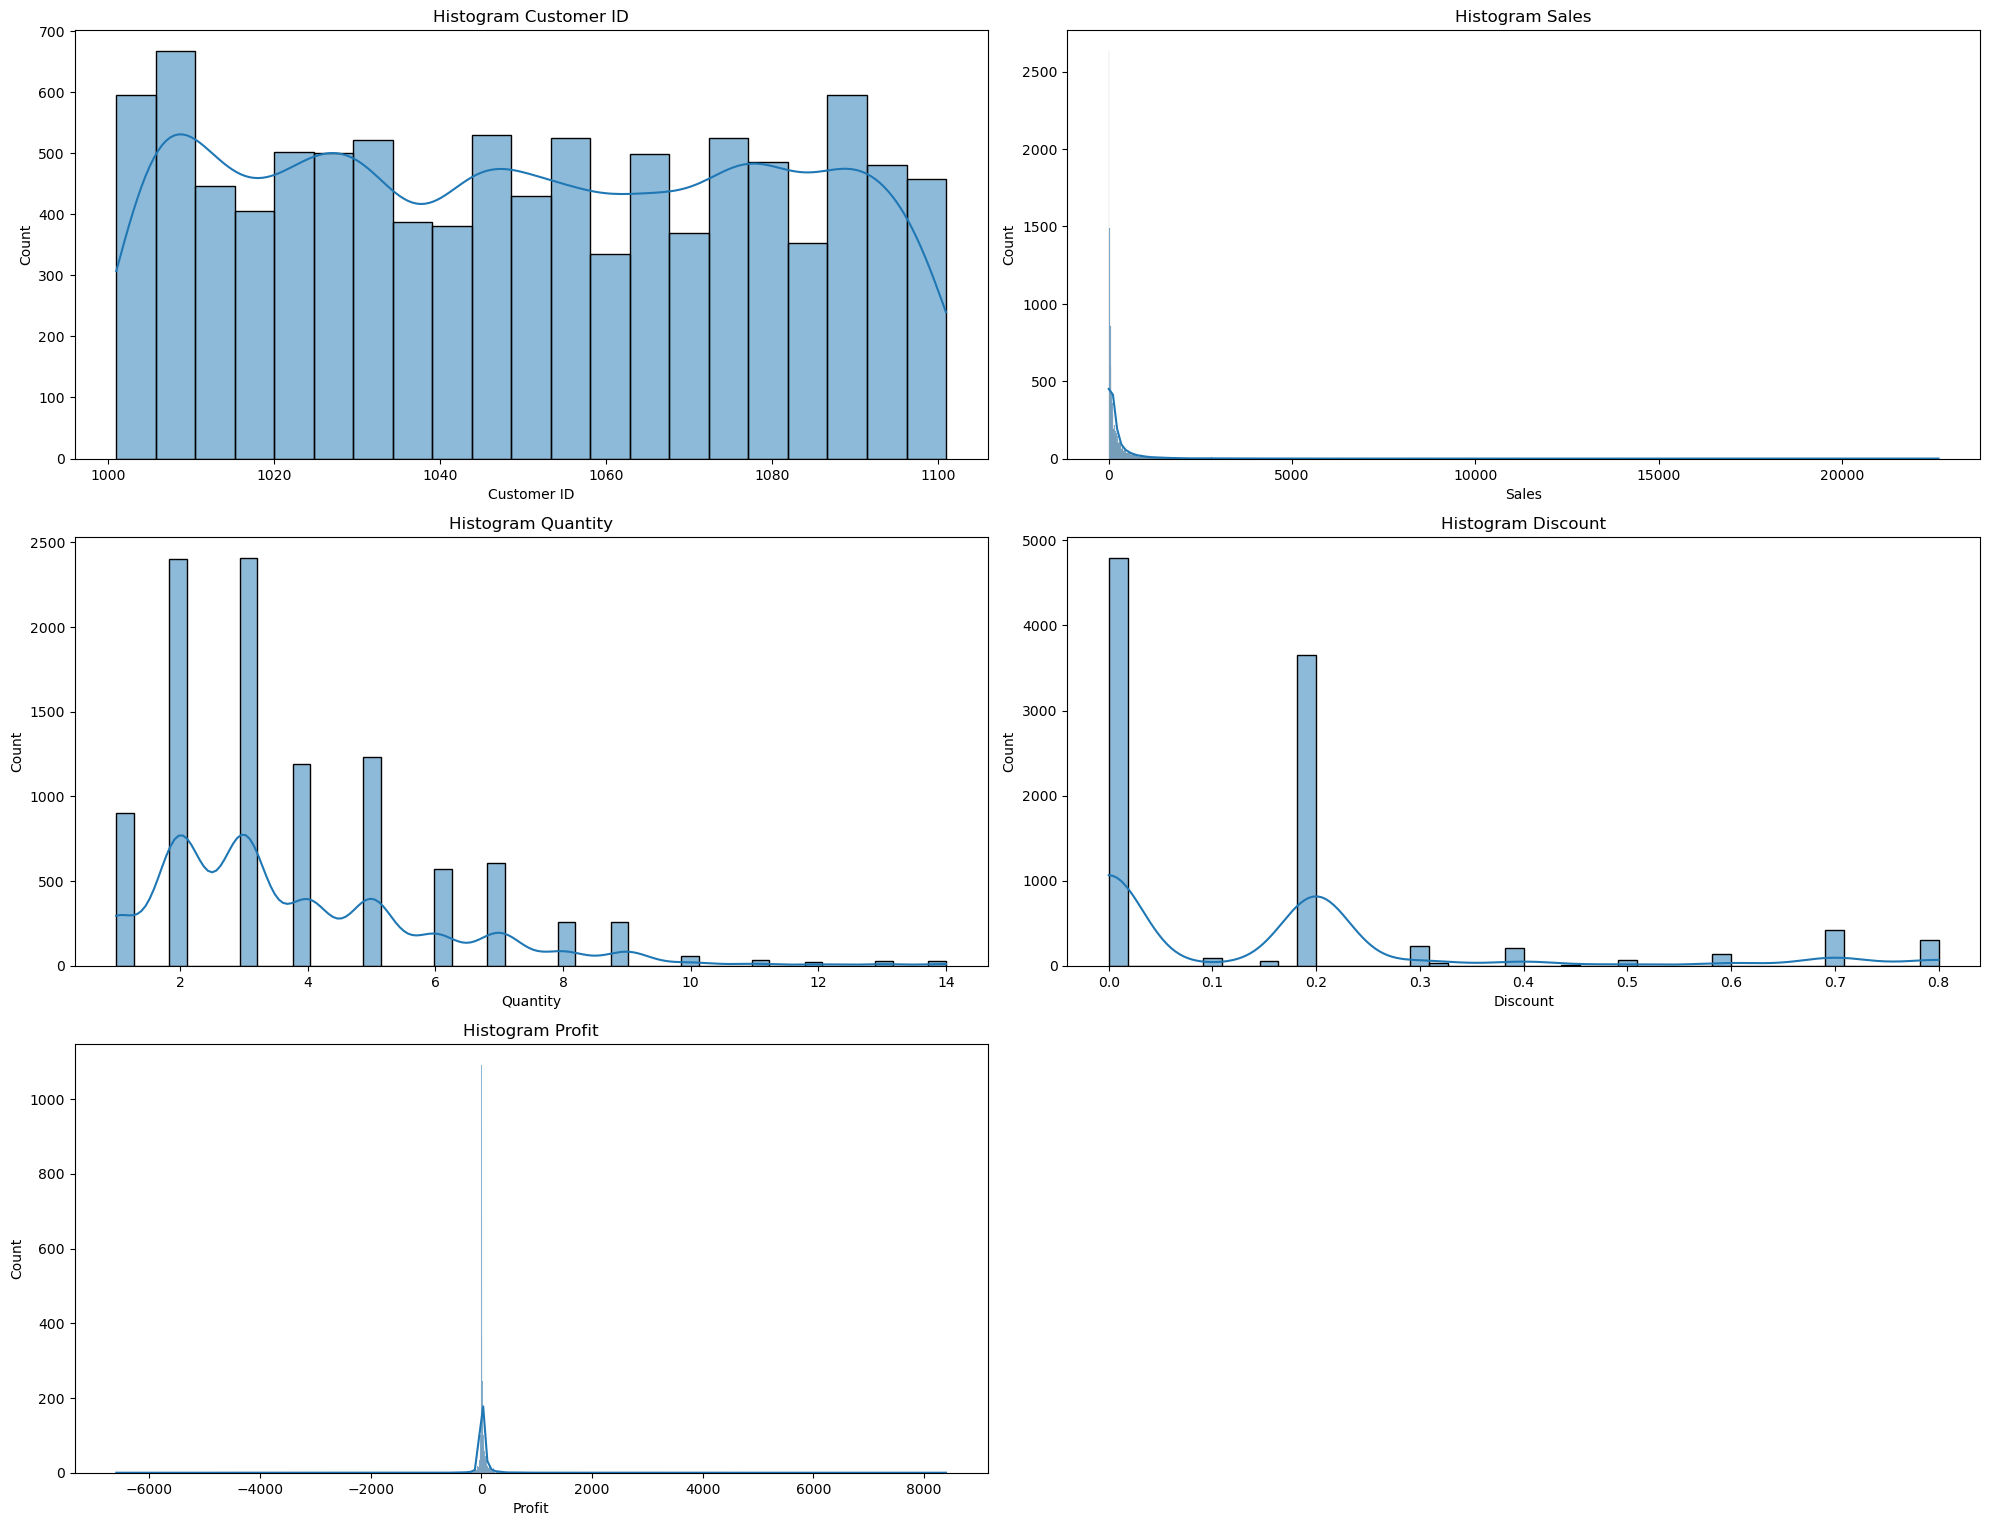

In [95]:
fig = plt.figure(figsize=(20,20)) # horizontal, vertical

count = 0
for kolom in numerik.columns:  # ganti "data" dengan nama DataFrame
    count += 1
    plt.subplot(4,2,count) 
    sns.histplot(numerik[kolom], kde=True)  # menggambarkan histogram
    plt.title(f"Histogram {kolom}")
    fig.tight_layout() # agar tidak tumpang tindih
plt.show()

#### Keterangan Histogram 
* Variabel Diskrit:
    * Row ID (Telah di Drop Kolom)
    * Order Date (Telah di Drop Kolom)
    * Date Key
    * Customer ID

* Variabel Continues:
    * Sales 
    * Quantity 
    * Discount 
    * Profit


Variabel diskrit terbatas pada sejumlah nilai yang terpisah, seperti ID atau Date Key, yang hanya dapat mengambil nilai-nilai tertentu. Sedangkan variabel Continues, seperti penjualan (Sales), kuantitas (Quantity), diskon (Discount), dan keuntungan (Profit), dapat mengambil nilai dalam rentang Continues atau tak terbatas, seperti uang atau kuantitas barang.

#### Keterangan Data Tidak Normal secara eksplisit dilihat dari historgram

* Histogram: Dari visualisasi histogram, kita dapat melihat bahwa distribusi variabel Sales, Quantity, dan Profit tidak terlihat simetris atau menyerupai kurva lonceng. Sebaliknya, distribusi variabel-variabel tersebut cenderung condong ke satu arah.

* Skewness: Nilai skewness yang positif untuk variabel Sales, Quantity, dan Profit menunjukkan bahwa distribusi data cenderung condong ke kanan, yang berarti terdapat lebih banyak outlier di sisi kanan distribusi.


### Outliers

C:\Users\DELL\AppData\Local\Temp\ipykernel_8128\2004058399.py:8: UserWarning: The figure layout has changed to tight
  fig.tight_layout() # biar tidak tertumpuk
C:\Users\DELL\AppData\Local\Temp\ipykernel_8128\2004058399.py:8: UserWarning: The figure layout has changed to tight
  fig.tight_layout() # biar tidak tertumpuk
C:\Users\DELL\AppData\Local\Temp\ipykernel_8128\2004058399.py:8: UserWarning: The figure layout has changed to tight
  fig.tight_layout() # biar tidak tertumpuk
C:\Users\DELL\AppData\Local\Temp\ipykernel_8128\2004058399.py:8: UserWarning: The figure layout has changed to tight
  fig.tight_layout() # biar tidak tertumpuk


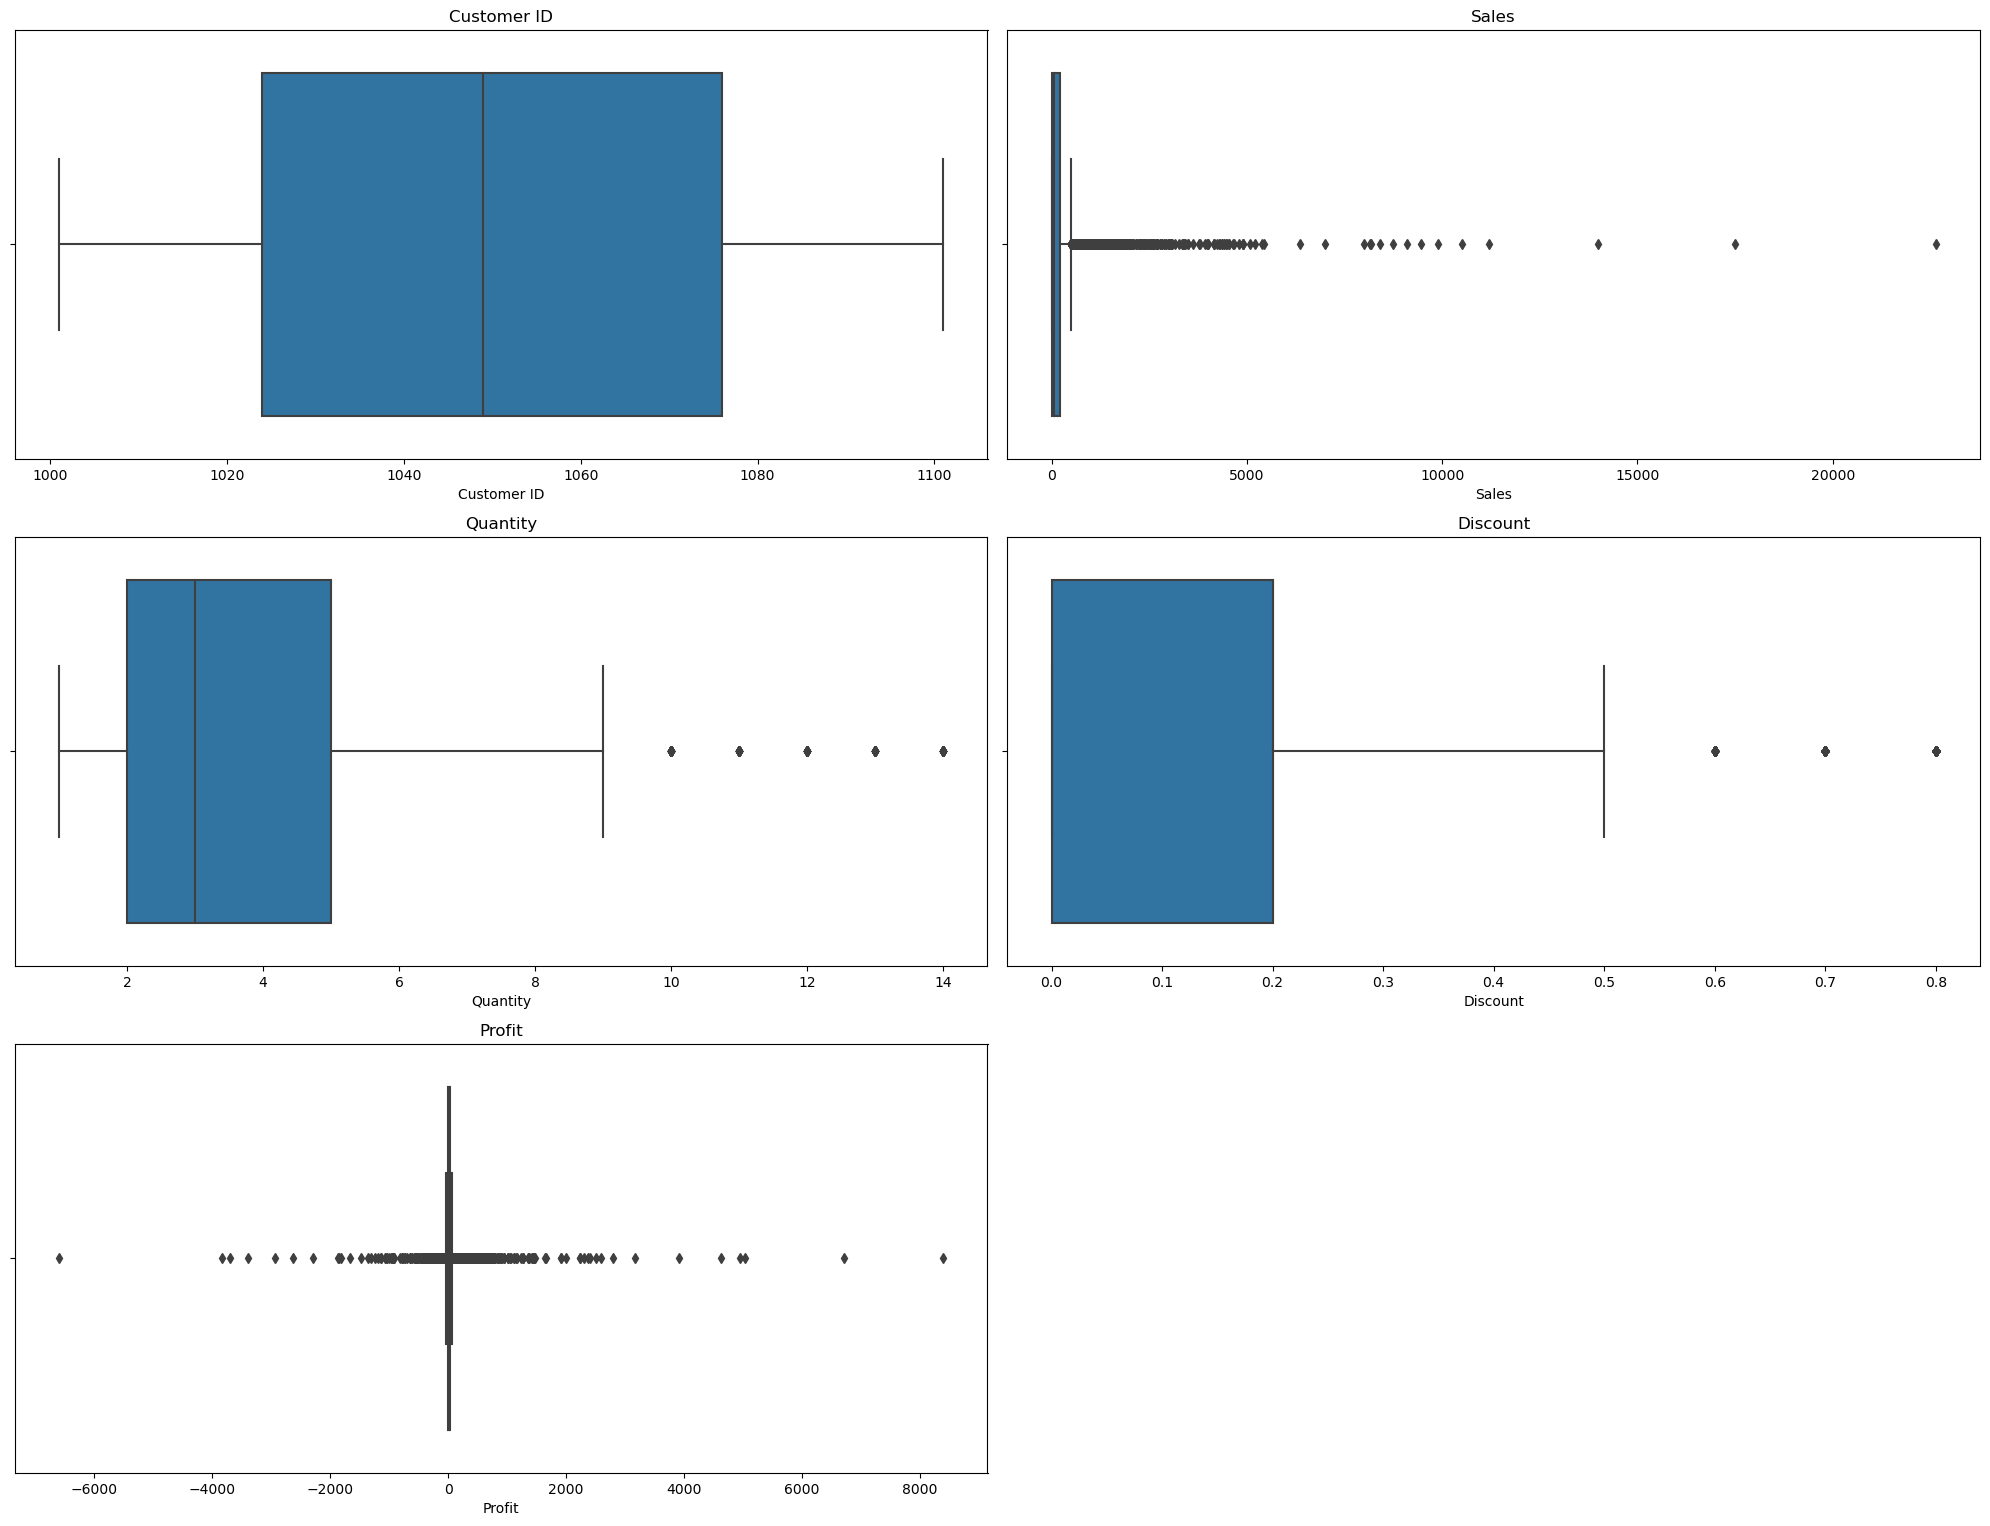

In [96]:
fig = plt.figure(figsize=(20,20)) # horizontal, vertikal

count = 0
for kolom in numerik.columns:
    count += 1
    plt.subplot(4,2,count)
    sns.boxplot(numerik, x = kolom)
    fig.tight_layout() # biar tidak tertumpuk
    plt.title(f'{kolom}')
plt.show()

In [97]:
for kolom in numerik.columns:
    q1 = df[kolom].describe().loc['25%']
    q3 = df[kolom].describe().loc['75%']
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr 

    jumlah_outliers = df[(df[kolom] < lower_bound) | (df[kolom] > upper_bound)].shape[0]
    print(f"data {kolom} memiliki outliers {jumlah_outliers}")

data Customer ID memiliki outliers 0
data Sales memiliki outliers 1167
data Quantity memiliki outliers 170
data Discount memiliki outliers 856
data Profit memiliki outliers 1881


#### Penjelasan , Jumlah , dan relevansi dari Outliers


* Customer ID:

    * Penjelasan: Customer ID adalah identifier unik untuk setiap pelanggan dalam dataset, dan tidak memiliki outlier karena merupakan atribut identifier.
    * Jumlah Outliers: 0
    * Relevansi: Karena Customer ID digunakan sebagai identifier dan tidak terkait dengan metrik bisnis tertentu, jumlah outlier tidak relevan untuk analisis.

* Sales:

    * Penjelasan: Sales adalah variabel numerik yang mewakili total penjualan, dan outlier dalam hal ini mungkin mencerminkan transaksi yang luar biasa besar atau kecil.
    * Jumlah Outliers: 1167
    * Relevansi: Jumlah outlier yang signifikan mungkin menunjukkan adanya transaksi ekstrim yang perlu diperhatikan atau diverifikasi. Outlier dalam hal ini masih relevan untuk analisis.

* Quantity:

    * Penjelasan: Quantity adalah variabel numerik yang mewakili jumlah barang yang dijual dalam satu transaksi, dan outlier mungkin mencerminkan transaksi yang tidak biasa besar atau kecil.
    * Jumlah Outliers: 170
    * Relevansi: Jumlah outlier yang cukup banyak mungkin menunjukkan adanya transaksi ekstrim yang perlu diperhatikan atau diverifikasi. Outlier dalam hal ini masih relevan untuk analisis.

* Discount:

    * Penjelasan: Discount adalah variabel numerik yang mewakili jumlah diskon yang diberikan dalam satu transaksi, dan outlier mungkin mencerminkan diskon yang tidak biasa besar atau kecil.
    * Jumlah Outliers: 856
    * Relevansi: Jumlah outlier yang cukup banyak mungkin menunjukkan adanya transaksi ekstrim yang perlu diperhatikan atau diverifikasi. Outlier dalam hal ini masih relevan untuk analisis.

* Profit:

    * Penjelasan: Profit adalah variabel numerik yang mewakili keuntungan yang dihasilkan dari setiap transaksi, dan outlier mungkin mencerminkan transaksi yang menghasilkan keuntungan yang sangat tinggi atau rendah.
    * Jumlah Outliers: 1881
    * Relevansi: Jumlah outlier yang signifikan mungkin menunjukkan adanya transaksi ekstrim yang perlu diperhatikan atau diverifikasi. Outlier dalam hal ini masih relevan untuk analisis.


### Korelasi

In [98]:
numerik.corr(method='spearman') # data diasumsikan tidak normal

,Customer ID,Sales,Quantity,Discount,Profit
Customer ID,1.000000,0.004174,-0.000905,0.011466,-0.011133
Sales,0.004174,1.000000,0.327426,-0.056969,0.518407
Quantity,-0.000905,0.327426,1.000000,-0.000878,0.234491
Discount,0.011466,-0.056969,-0.000878,1.000000,-0.543350
Profit,-0.011133,0.518407,0.234491,-0.543350,1.000000


<Axes: >

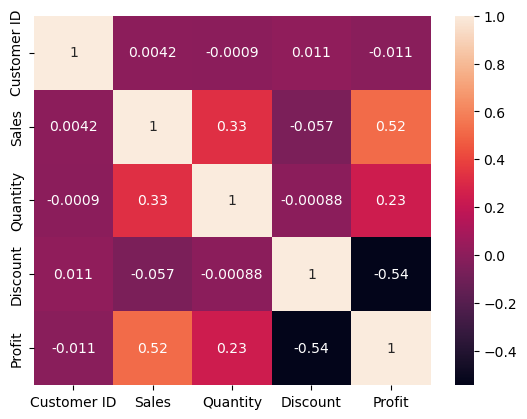

In [99]:
sns.heatmap(numerik.corr(method='spearman'), annot=True)

#### Variabel yang berkorelasi 
* Sales dan Profit memiliki korelasi positif yang cukup tinggi, sebesar 0.518. Ini menunjukkan bahwa adanya kenaikan dalam penjualan (Sales) berhubungan dengan peningkatan keuntungan (Profit).

* Quantity dan Sales juga memiliki korelasi yang cukup kuat, sebesar 0.327. Ini menunjukkan bahwa peningkatan jumlah barang yang terjual (Quantity) berkaitan dengan peningkatan dalam penjualan (Sales).

* Discount dan Profit memiliki korelasi negatif yang cukup kuat, sebesar -0.543. Ini menunjukkan bahwa adanya diskon (Discount) cenderung berkorelasi dengan penurunan keuntungan (Profit).

## Kategorik

In [100]:
kategorik = df.select_dtypes(exclude='number')


In [101]:
kategorik

,Order ID,Order Date,Contact Name,Country,City,Region,Subregion,Customer,Industry,Segment,Product,License
0,EMEA-2022-152156,2022-11-09,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,Energy,SMB,Marketing Suite,16GRM07R1K
1,EMEA-2022-152156,2022-11-09,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,Energy,SMB,FinanceHub,QLIW57KZUV
2,AMER-2022-138688,2022-06-13,Deirdre Bailey,United States,New York City,AMER,NAMER,Phillips 66,Energy,Strategic,FinanceHub,JI6BVL70HQ
3,EMEA-2021-108966,2021-10-11,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,Energy,SMB,ContactMatcher,DE9GJKGD44
4,EMEA-2021-108966,2021-10-11,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,Energy,SMB,Marketing Suite - Gold,OIF7NY23WD
...,...,...,...,...,...,...,...,...,...,...,...,...
9989,EMEA-2020-110422,2020-01-22,Dan Allan,Germany,Hamburg,EMEA,EU-WEST,Johnson & Johnson,Healthcare,SMB,SaaS Connector Pack,ETHXMB5TMD
9990,AMER-2023-121258,2023-02-27,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,Finance,SMB,SaaS Connector Pack,LYHOKTRY7L
9991,AMER-2023-121258,2023-02-27,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,Finance,SMB,Site Analytics,I5SVMI6M88
9992,AMER-2023-121258,2023-02-27,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,Finance,SMB,Support,JHLW4P6LQ2


### Count Values

In [102]:
kategorik.nunique()

Order ID        5009
Order Date      1237
Contact Name     793
Country           48
City             262
Region             3
Subregion         12
Customer          99
Industry          10
Segment            3
Product           14
License         9994
dtype: int64

#### Keterangan Count Values

* Order ID: Ada 5009 nilai unik dalam kolom ini.
* Contact Name: Terdapat 793 nama kontak yang berbeda.
* Country: Ada 48 negara yang berbeda.
* City: Terdapat 262 kota yang berbeda.
* Region: Ada 3 wilayah yang berbeda.
* Subregion: Terdapat 12 subwilayah yang berbeda.
* Customer: Ada 99 pelanggan yang berbeda.
* Industry: Terdapat 10 industri yang berbeda.
* Segment: Ada 3 segment pelanggan yang berbeda.
* Product: Terdapat 14 produk yang berbeda.
* License: Ada 9994 nomor lisensi yang berbeda.

### Modus 

In [103]:
kategorik.describe(include='object')

,Order ID,Contact Name,Country,City,Region,Subregion,Customer,Industry,Segment,Product,License
count,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994
unique,5009,793,48,262,3,12,99,10,3,14,9994
top,EMEA-2023-100111,Leonard Kelly,United States,London,EMEA,NAMER,Allianz,Finance,SMB,ContactMatcher,16GRM07R1K
freq,14,37,2001,922,4219,2507,192,2127,5191,1842,1


#### Keterangan 

* Order ID:
    * Terdapat 5009 nilai unik dalam kolom ini.
    * Nilai yang paling sering muncul (modus) adalah 'EMEA-2023-100111', muncul sebanyak 14 kali.

* Contact Name:
    * Terdapat 793 nilai unik dalam kolom ini.
    * Nilai yang paling sering muncul (modus) adalah 'Leonard Kelly', muncul sebanyak 37 kali.

* Country:
    * Terdapat 48 nilai unik dalam kolom ini.
    * Nilai yang paling sering muncul (modus) adalah 'United States', muncul sebanyak 2001 kali.

* City:
    * Terdapat 262 nilai unik dalam kolom ini.
    * Nilai yang paling sering muncul (modus) adalah 'London', muncul sebanyak 922 kali.

* Region:
    * Terdapat 3 nilai unik dalam kolom ini.
    * Nilai yang paling sering muncul (modus) adalah 'EMEA', muncul sebanyak 4219 kali.

* Subregion:
    * Terdapat 12 nilai unik dalam kolom ini.
    * Nilai yang paling sering muncul (modus) adalah 'NAMER', muncul sebanyak 2507 kali.

* Customer:
    * Terdapat 99 nilai unik dalam kolom ini.
    * Nilai yang paling sering muncul (modus) adalah 'Allianz', muncul sebanyak 192 kali.

* Industry:
    * Terdapat 10 nilai unik dalam kolom ini.
    * Nilai yang paling sering muncul (modus) adalah 'Finance', muncul sebanyak 2127 kali.

* Segment:
    * Terdapat 3 nilai unik dalam kolom ini.
    * Nilai yang paling sering muncul (modus) adalah 'SMB', muncul sebanyak 5191 kali.
    
* Product:
    * Terdapat 14 nilai unik dalam kolom ini.
    * Nilai yang paling sering muncul (modus) adalah 'ContactMatcher', muncul sebanyak 1842 kali.

* License:
    * Terdapat 9994 nilai unik dalam kolom ini (setiap nilai unik muncul hanya satu kali).

C:\Users\DELL\AppData\Local\Temp\ipykernel_8128\1176312381.py:7: UserWarning: The figure layout has changed to tight
  fig.tight_layout()
C:\Users\DELL\AppData\Local\Temp\ipykernel_8128\1176312381.py:7: UserWarning: The figure layout has changed to tight
  fig.tight_layout()
C:\Users\DELL\AppData\Local\Temp\ipykernel_8128\1176312381.py:7: UserWarning: The figure layout has changed to tight
  fig.tight_layout()
C:\Users\DELL\AppData\Local\Temp\ipykernel_8128\1176312381.py:7: UserWarning: The figure layout has changed to tight
  fig.tight_layout()


C:\Users\DELL\AppData\Local\Temp\ipykernel_8128\1176312381.py:7: UserWarning: The figure layout has changed to tight
  fig.tight_layout()
C:\Users\DELL\AppData\Local\Temp\ipykernel_8128\1176312381.py:7: UserWarning: The figure layout has changed to tight
  fig.tight_layout()
C:\Users\DELL\AppData\Local\Temp\ipykernel_8128\1176312381.py:7: UserWarning: The figure layout has changed to tight
  fig.tight_layout()
C:\Users\DELL\AppData\Local\Temp\ipykernel_8128\1176312381.py:7: UserWarning: The figure layout has changed to tight
  fig.tight_layout()
C:\Users\DELL\AppData\Local\Temp\ipykernel_8128\1176312381.py:7: UserWarning: The figure layout has changed to tight
  fig.tight_layout()
C:\Users\DELL\AppData\Local\Temp\ipykernel_8128\1176312381.py:7: UserWarning: The figure layout has changed to tight
  fig.tight_layout()
C:\Users\DELL\AppData\Local\Temp\ipykernel_8128\1176312381.py:7: UserWarning: The figure layout has changed to tight
  fig.tight_layout()


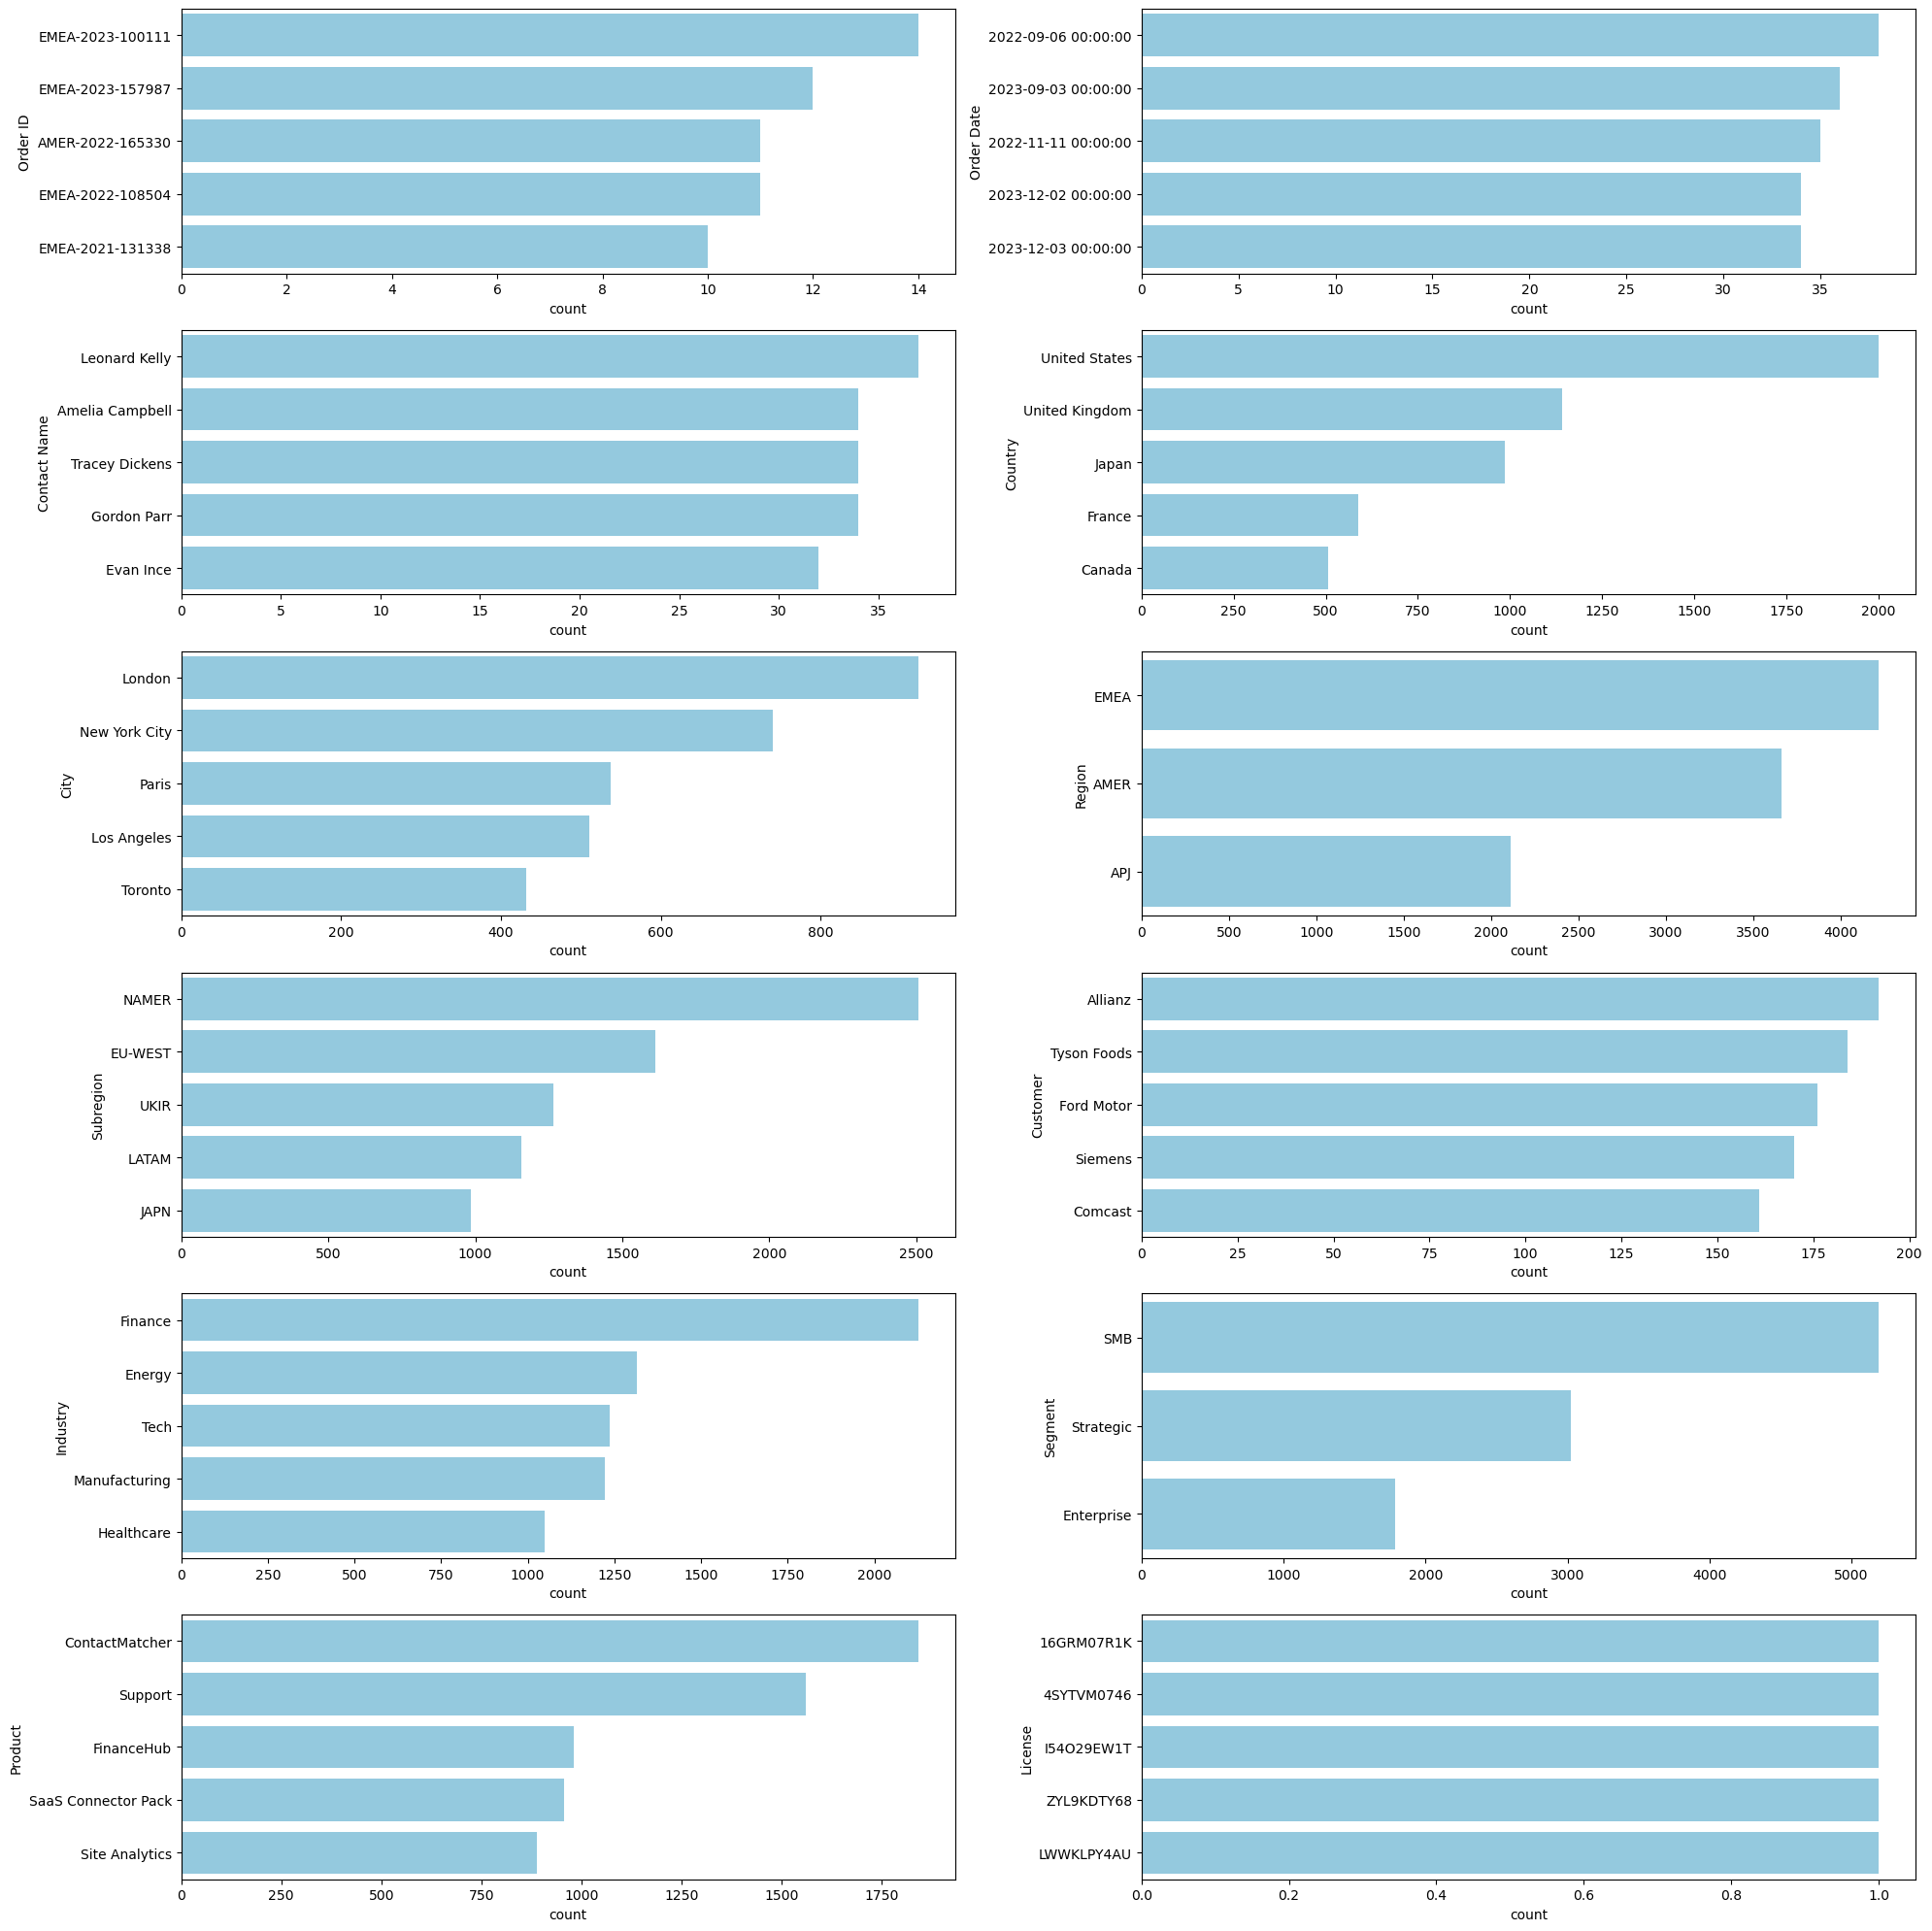

In [104]:
count = 0
fig = plt.figure(figsize=(20,20))
for kolom in kategorik.columns:
    count += 1
    plt.subplot(6,2,count)
    sns.countplot(y = kolom, data = kategorik, order = kategorik[kolom].value_counts().sort_values(ascending = False).head(5).index, color= 'skyblue')
    fig.tight_layout()
plt.show()

* Order ID: setiap Order ID memiliki jumlah yang sama, hal ini mungkin menunjukkan bahwa setiap Order ID hanya terjadi sekali (unik).
* Contact Name: Dari grafik, "Leonard Kelly" adalah nama kontak yang paling umum dengan frekuensi 37.
* Country: "United States" adalah negara dengan frekuensi terbanyak, yaitu 2001.
* City: Kota "London" memiliki frekuensi tertinggi, yaitu 922.
* Region: Wilayah "EMEA" (Europe, Middle East, and Africa) memiliki frekuensi tertinggi, yaitu 4219.
* Subregion: Subwilayah "NAMER" (North America) memiliki frekuensi tertinggi, yaitu 2507.
* Customer: Pelanggan "Allianz" memiliki frekuensi tertinggi, yaitu 192.
* Industry: Industri "Finance" memiliki frekuensi tertinggi, yaitu 2127.
* Segment: Segment "SMB" (Small and Medium-sized Business) memiliki frekuensi tertinggi, yaitu 5191.
* Product: Produk dengan nama "ContactMatcher" adalah yang paling umum, dengan frekuensi 1842.
* License: Setiap nomor lisensi (License) hanya muncul sekali, oleh karena itu tidak ada nilai yang memiliki frekuensi lebih tinggi daripada yang lain.

# Data Cleaning

In [105]:
df_prep = df.copy() # ini penting agar tidak terlalu jauh kalau ingin mengulang cleaning

## Handling Missing Values

<Axes: >

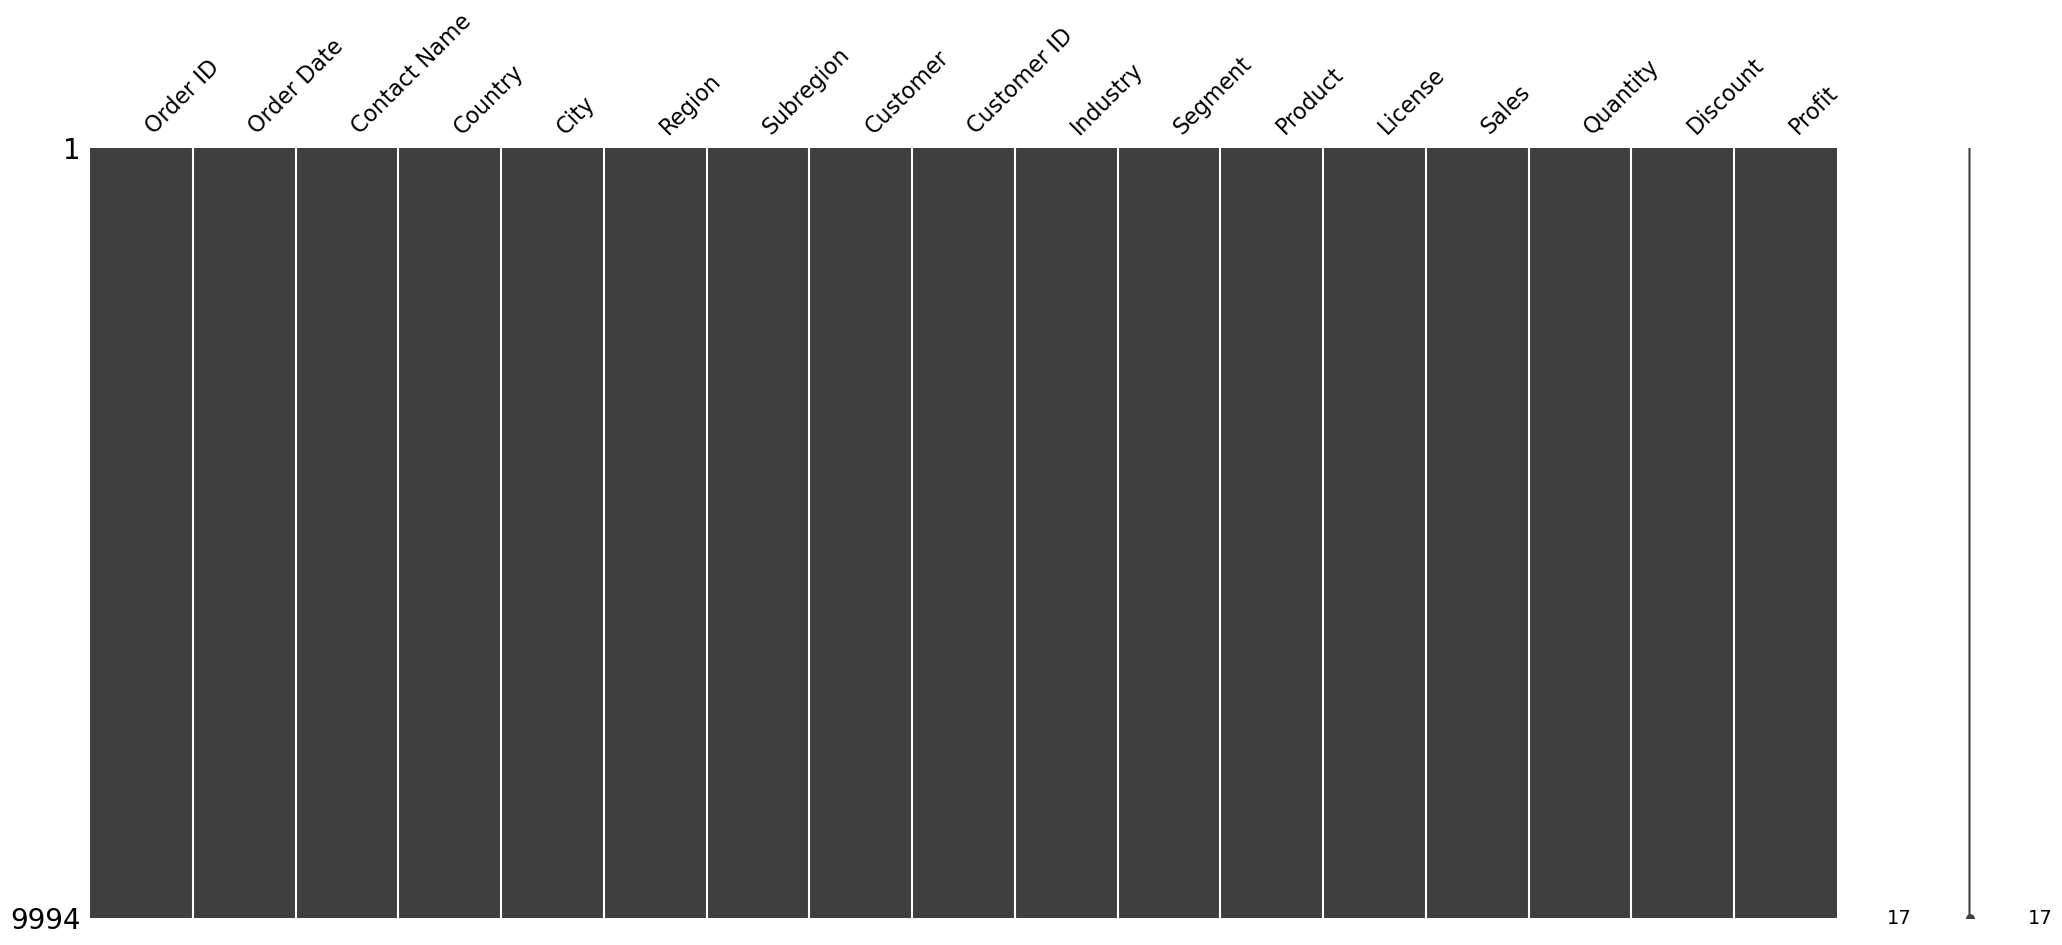

In [106]:
import missingno
missingno.matrix(df_prep)

In [107]:
# cek data yang missing values
df_prep[df_prep.isna().any(axis = 1)] # menunjukkan semua data yang missing

,Order ID,Order Date,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit


karena missing values mengandung nilai 0 dalam representasi yang benar dan tidak ada kebutuhan untuk menganggapnya sebagai missing values, maka  tidak diperlukan untuk melakukan handling tambahan untuk missing values.

## Handling untuk outliers

C:\Users\DELL\AppData\Local\Temp\ipykernel_8128\263720746.py:8: UserWarning: The figure layout has changed to tight
  fig.tight_layout() # biar tidak tertumpuk


C:\Users\DELL\AppData\Local\Temp\ipykernel_8128\263720746.py:8: UserWarning: The figure layout has changed to tight
  fig.tight_layout() # biar tidak tertumpuk
C:\Users\DELL\AppData\Local\Temp\ipykernel_8128\263720746.py:8: UserWarning: The figure layout has changed to tight
  fig.tight_layout() # biar tidak tertumpuk
C:\Users\DELL\AppData\Local\Temp\ipykernel_8128\263720746.py:8: UserWarning: The figure layout has changed to tight
  fig.tight_layout() # biar tidak tertumpuk


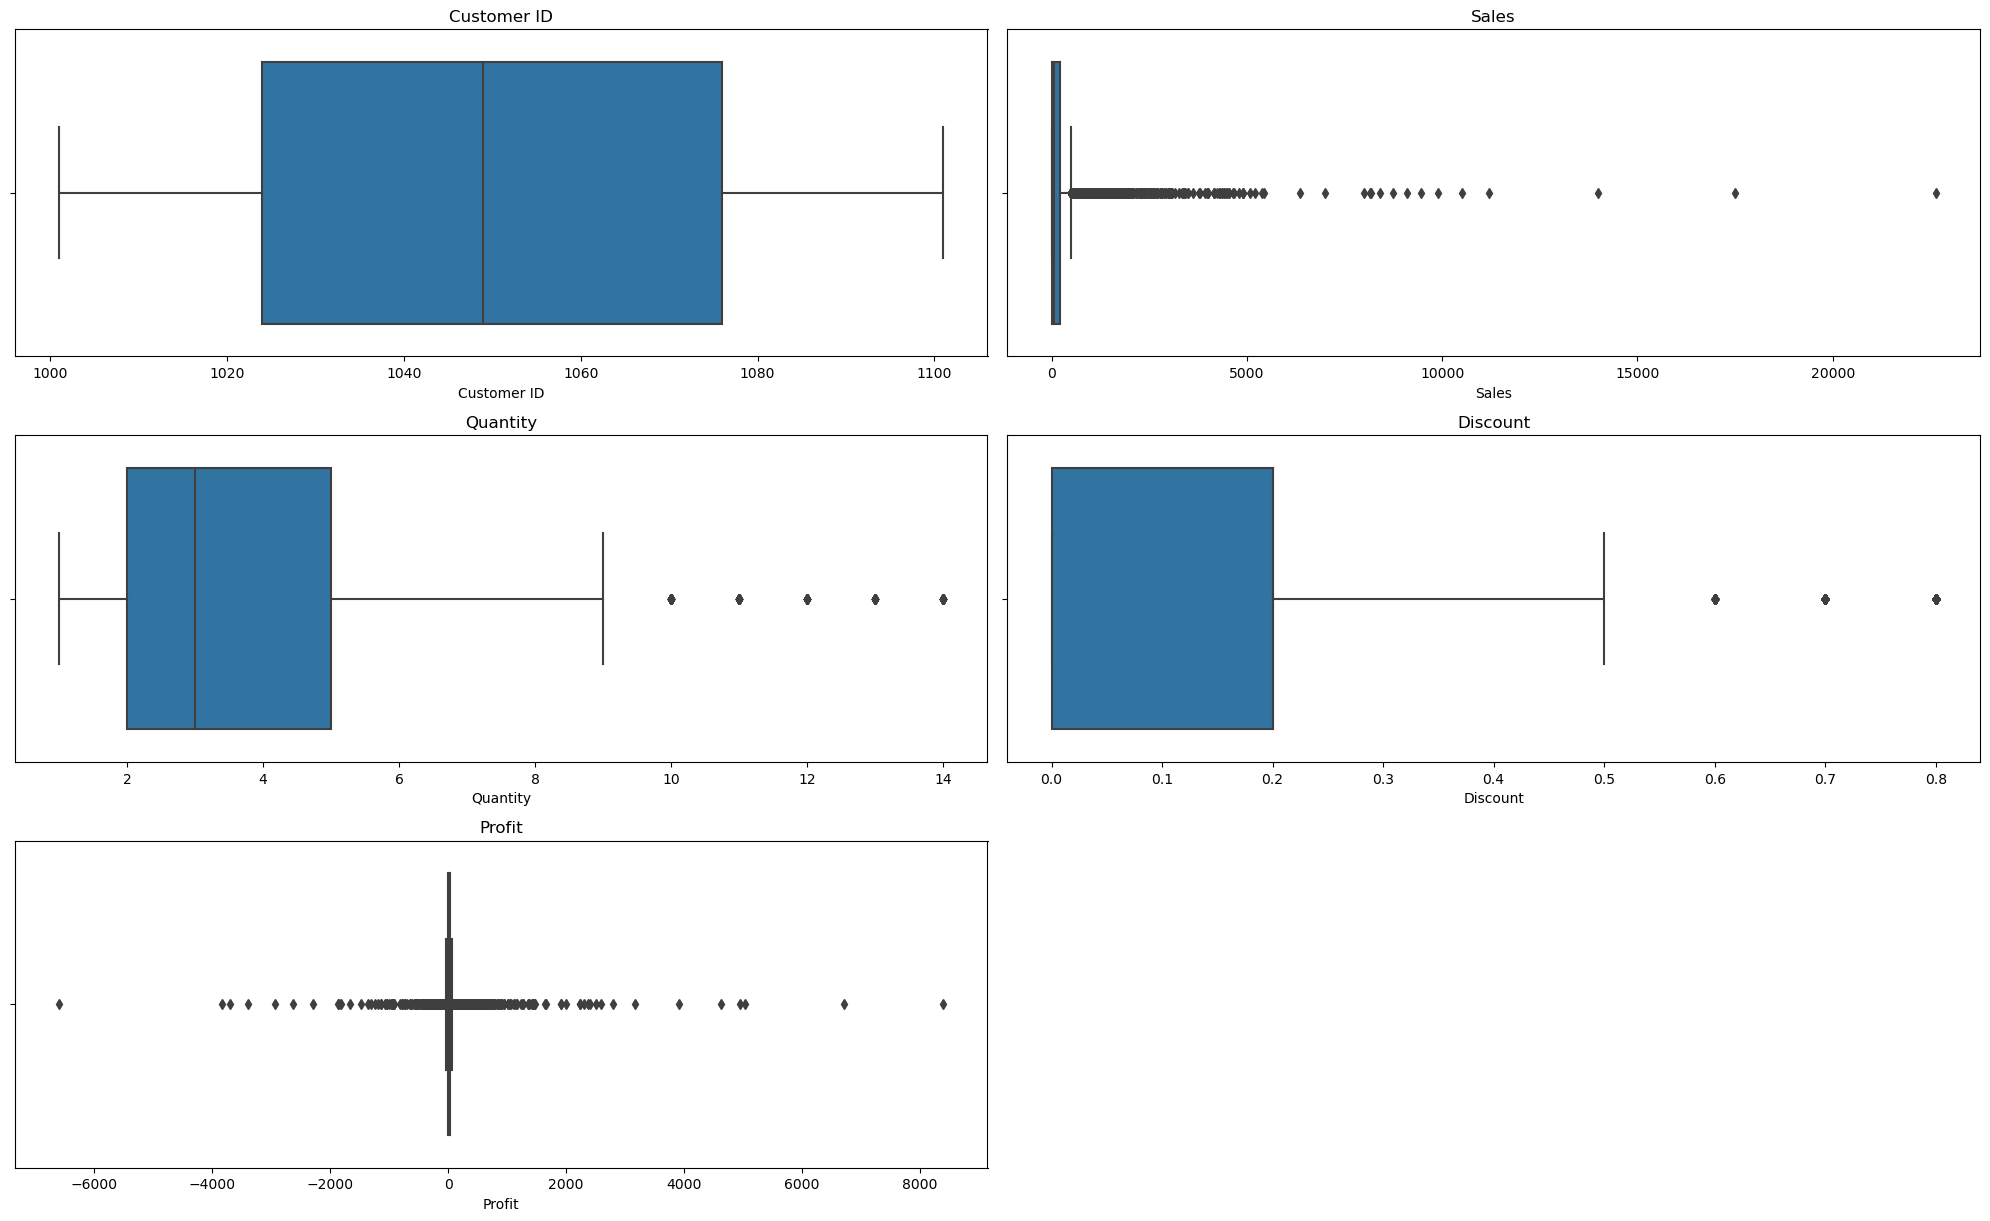

In [108]:
fig = plt.figure(figsize=(20,20)) # horizontal, vertikal

count = 0
for kolom in numerik.columns:
    count += 1
    plt.subplot(5,2,count)
    sns.boxplot(numerik, x = kolom)
    fig.tight_layout() # biar tidak tertumpuk
    plt.title(f'{kolom}')
plt.show()

Outliers diputuskan untuk tidak dihapus atau dihilangkan dikarenakan ada indikasi bahwa dalam outliers ini mengandung informasi penting tentang kejadian langka yang sebenarnya relevan dalam konteks analisis. Dikhawatirkan jika menghapus outliers dapat menyebabkan kehilangan wawasan penting tentang fenomena yang diamati.

In [109]:

dfCleaned = pd.DataFrame(df_prep)
csv = 'dfCleaned.csv'
dfCleaned.to_csv('dfCleaned.csv', index=False)

# EDA (Exploratory Data Analysis)

Profit akan dijadikan variabel target , hal ini dikarenakan secara eksplisit terlihat adanya hal menarik yaitu profit negatif. analisis diharapkan akan menentukan faktor-faktor apa yang mempengaruhi profitabilitas negatif dalam penjualan produk SaaS di AWS.

- variabel target (dependen) : Profit
- variabel yang mempengaruhi (independen) : kolom lainnya

## Profit Vs Kolom Numerik

alasan mengapa hal ini dianalisis terlebih dahulu dikarenakan , biasanya tujuan utama dari sales/penjualan untuk perusahaan adalah seberapa besar profit yang akan dihasilkan. maka dari itu , analisis ini membawa data mana saja yang membawa perusahaan untuk kemajuan di sisi keuntungan / profit dibandingkan dengan kolom -kolom numerik. 

C:\Users\DELL\AppData\Local\Temp\ipykernel_8128\1420631668.py:11: UserWarning: The figure layout has changed to tight
  fig.tight_layout()  # Mengatur layout subplot agar tidak tertumpuk
C:\Users\DELL\AppData\Local\Temp\ipykernel_8128\1420631668.py:11: UserWarning: The figure layout has changed to tight
  fig.tight_layout()  # Mengatur layout subplot agar tidak tertumpuk
C:\Users\DELL\AppData\Local\Temp\ipykernel_8128\1420631668.py:11: UserWarning: The figure layout has changed to tight
  fig.tight_layout()  # Mengatur layout subplot agar tidak tertumpuk
C:\Users\DELL\AppData\Local\Temp\ipykernel_8128\1420631668.py:11: UserWarning: The figure layout has changed to tight
  fig.tight_layout()  # Mengatur layout subplot agar tidak tertumpuk


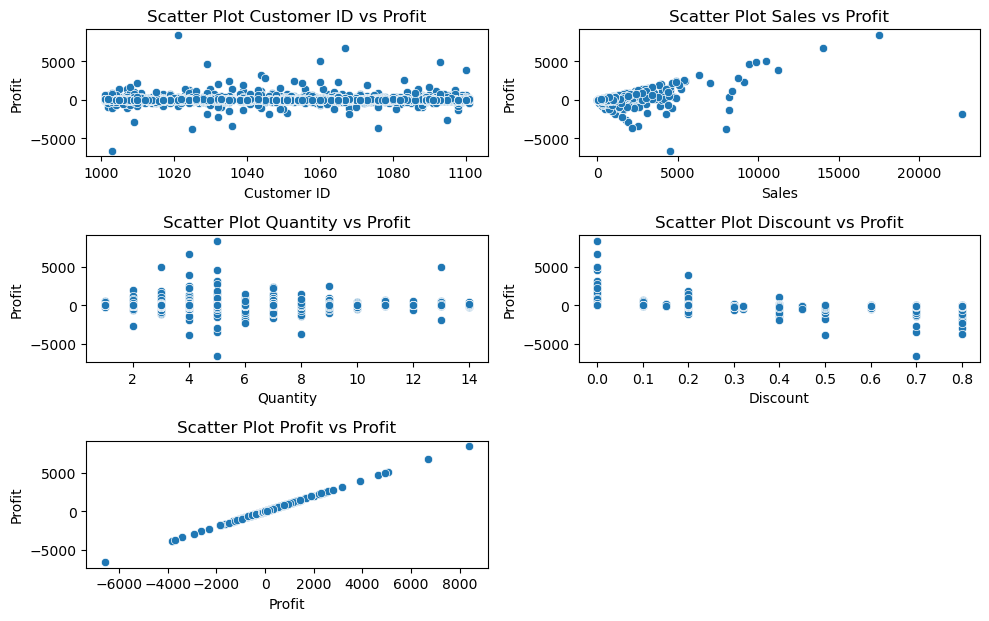

In [110]:
# Mendefinisikan ukuran figure
fig = plt.figure(figsize=(10,10))

# Loop untuk setiap kolom numerik
count = 0
for kolom in numerik.columns:
    count += 1
    plt.subplot(5, 2, count)
    sns.scatterplot(x=kolom, y='Profit', data=dfCleaned)  # Menggunakan variabel kolom sebagai sumbu-x
    plt.title(f"Scatter Plot {kolom} vs Profit")
    fig.tight_layout()  # Mengatur layout subplot agar tidak tertumpuk
    
# Menampilkan plot
plt.show()


#### Analisis Scatter Plot 
data analisis dengan scatter plot ini menunjukkan berbagai data . satu data yang menarik perhatian yakni adanya profibilitas negatif. hal ini harus di analisis lebih lanjut dengan berbagai data yang memungkinkan.

## Analisis Produk dengan Profit.
data analisis ini untuk mengetahui produk mana yang memiliki profibilitas negatif dan profibilitas yang positif. 

In [111]:
# Grouping by 'Product' and calculating the percentage of profit for each product
profit_percent = df.groupby("Product")[["Profit"]].sum()
total_profit = profit_percent["Profit"].sum()
profit_percent["Profit_Percentage"] = (profit_percent["Profit"] / total_profit) * 100

# Rounding to 2 decimal places and adding '%' symbol for Profit_Percentage
profit_percent["Profit_Percentage"] = profit_percent["Profit_Percentage"].round(2).astype(str) + '%'

# Formatting Profit column to include '$'
profit_percent["Profit"] = profit_percent["Profit"].map('${:,.2f}'.format)

# Sorting by Profit Percentage in descending order
profit_percent = profit_percent.sort_values("Profit_Percentage", ascending=False)

profit_percent

,Profit,Profit_Percentage
Product,,
Marketing Suite - Gold,"$21,278.83",7.43%
OneView,"$18,138.01",6.33%
SaaS Connector Pack,"$13,059.14",4.56%
ContactMatcher,"$12,496.28",4.36%
SaaS Connector Pack - Gold,"$6,964.18",2.43%
ChatBot Plugin,"$6,527.79",2.28%
Alchemy,"$55,617.82",19.42%
Site Analytics,"$44,515.73",15.54%
Data Smasher,"$41,936.64",14.64%


C:\Users\DELL\AppData\Local\Temp\ipykernel_8128\340227919.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 0)` for the same effect.

  ax = sns.barplot(


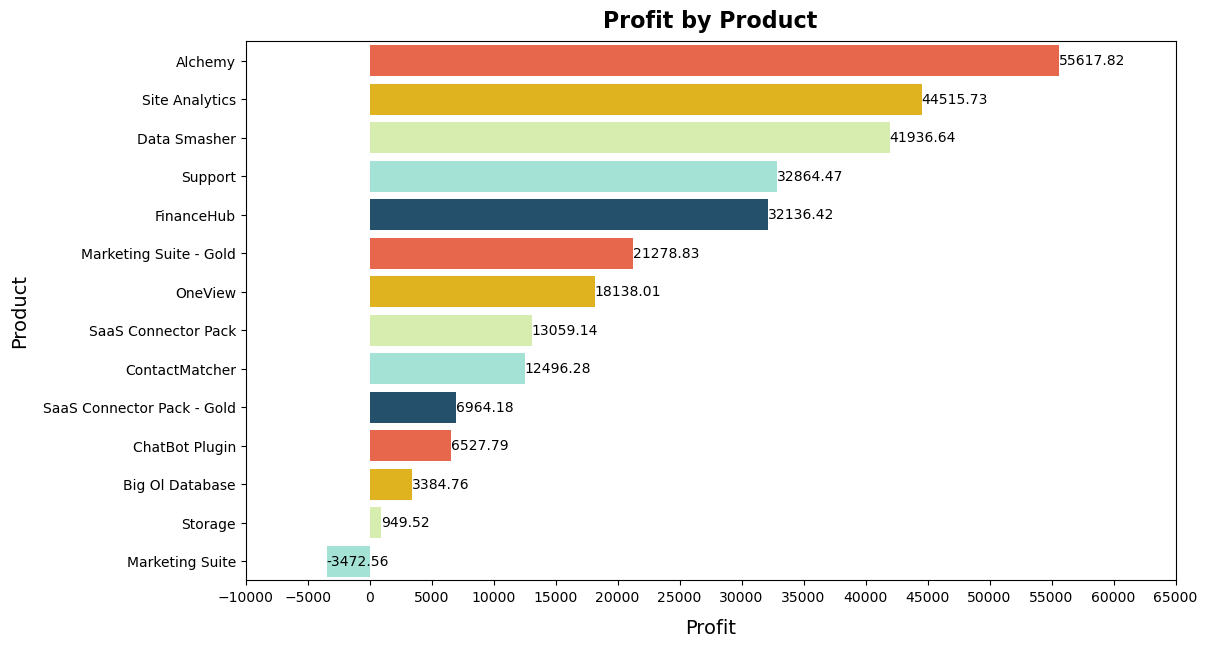

In [112]:

plt.figure(figsize=(12, 7))

# Definisikan palet warna kustom di luar fungsi barplot
custom_palette = ["#FF5733", "#FFC300", "#DAF7A6", "#9AECDB", "#1A5276"]

# Plot bar chart
ax = sns.barplot(
    data=df,
    y="Product",
    x="Profit",
    ci=0,
    palette=custom_palette,  # Menggunakan palet warna kustom yang telah didefinisikan
    estimator="sum",
    order=df.groupby("Product")[["Profit"]].sum().sort_values("Profit", ascending=False).index
)

# Labeling bars with profit values
for container in ax.containers:
    for bar in container:
        x = bar.get_width()
        plt.text(x, bar.get_y() + bar.get_height()/2, f'{x:.2f}', va='center', ha='left', color='black', fontsize=10)  # Mengatur warna teks menjadi hitam

plt.title("Profit by Product", size=16, pad=10, fontweight='bold')
plt.xlabel("Profit", size=14, labelpad=10)
plt.ylabel("Product", size=14, labelpad=10)
plt.xticks(range(-10000, 65001, 5000))
plt.show()


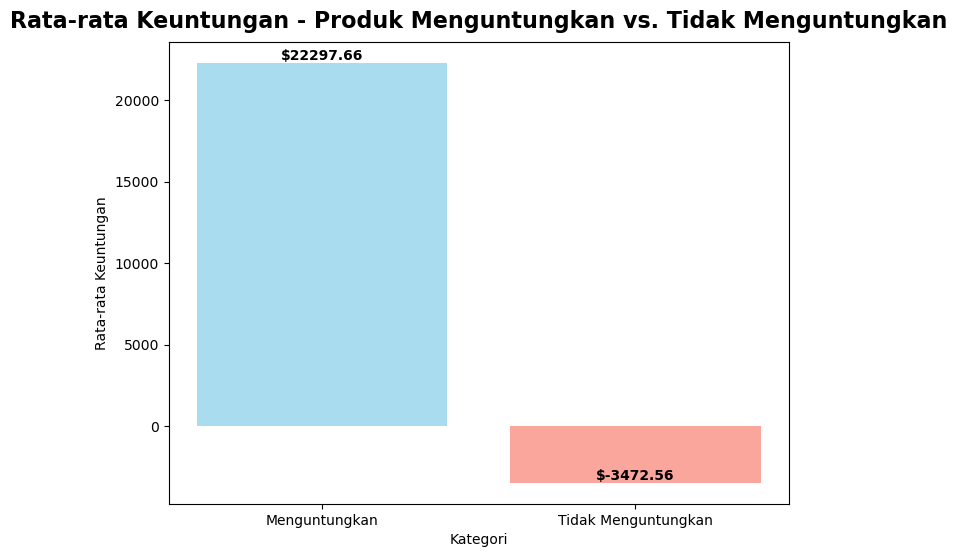

In [113]:
# Mengelompokkan data berdasarkan 'Product' dan menghitung total keuntungan untuk setiap produk
product_profit = df.groupby('Product')['Profit'].sum().reset_index()

# Mengategorikan produk sebagai menguntungkan atau tidak menguntungkan berdasarkan nilai keuntungan
threshold = 0  # Tetapkan ambang batas untuk keuntungan positif atau negatif
product_profit['Profitable'] = product_profit['Profit'] > threshold

# Pisahkan produk yang menguntungkan dan tidak menguntungkan
profitable_products = product_profit[product_profit['Profitable'] == True]
non_profitable_products = product_profit[product_profit['Profitable'] == False]

# Hitung statistik ringkasan untuk produk yang menguntungkan dan tidak menguntungkan
profitable_stats = profitable_products['Profit'].describe()
non_profitable_stats = non_profitable_products['Profit'].describe()

# Hitung rata-rata keuntungan untuk produk yang menguntungkan dan tidak menguntungkan
profitable_mean = profitable_products['Profit'].mean()
non_profitable_mean = non_profitable_products['Profit'].mean()

# Plot diagram batang
plt.figure(figsize=(8, 6))
bars = plt.bar(['Menguntungkan', 'Tidak Menguntungkan'], [profitable_mean, non_profitable_mean],
               color=['skyblue', 'salmon'], alpha=0.7)

plt.title('Rata-rata Keuntungan - Produk Menguntungkan vs. Tidak Menguntungkan', size=16, pad=10, fontweight='bold')
plt.xlabel('Kategori')
plt.ylabel('Rata-rata Keuntungan')

# Menambahkan anotasi dengan simbol dollar pada batang
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'${height:.2f}',
             ha='center', va='bottom', fontweight='bold', color='black')

plt.show()


#### Insight Profit vs Produk
Top 3 Produk dengan Profit Positif : 
 * Alchemy 
 * Site Analytics
 * Data Smasher

 Produk dengan Profit Negatif : 
 * Marketing Suite


 dari analisa Profit vs Product ini , kita bisa melihat bahwa alchemy, site analytics dan data smasher menjadi tiga produk dengan profit terbesar , dan alchemy menjadi produk dengan rata-rata profit paling tinggi. sedangkan untuk produk *_marketing suite_* menjadi satu satunya produk dengan rata-rata profit negatif dan mempengaruhi seluruh profit. tetapi hal ini tetap harus di analisis lebih lanjut untuk mengetahuinya. hal ini akan membawa marketing suites menjadi data yang terfokus untuk di analisis.

## Produk yang memiliki Profit Negatif

dari data sebelumnya kita bisa melihat bahwa marketing suite menjadi profit dengan profit negatif

In [114]:
#melihat data dengan produk marketing suite

df_msuite = df[df["Product"] == "Marketing Suite"]

display(df_msuite.head())
display(df_msuite.tail())

,Order ID,Order Date,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
0,EMEA-2022-152156,2022-11-09,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,Marketing Suite,16GRM07R1K,261.9600,2,0.00,41.9136
27,EMEA-2021-150630,2021-09-17,Neil Gill,France,Paris,EMEA,EU-WEST,Intel,1051,Tech,SMB,Marketing Suite,F8G07TWQ17,3083.4300,7,0.50,-1665.0522
38,APJ-2021-117415,2021-12-27,Jasmine Metcalfe,Japan,Tokyo,APJ,JAPN,Banco Santander,1101,Finance,Enterprise,Marketing Suite,FBXEM82WEZ,532.3992,3,0.32,-46.9764
189,EMEA-2021-102281,2021-10-12,Dylan Ogden,United Kingdom,London,EMEA,UKIR,HonHai Precision Industry,1033,Tech,Enterprise,Marketing Suite,7LL8W4OBLM,899.1360,4,0.20,112.3920
192,EMEA-2021-102281,2021-10-12,Dylan Ogden,United Kingdom,London,EMEA,UKIR,HonHai Precision Industry,1033,Tech,Enterprise,Marketing Suite,L0NREOWV2Y,626.3520,3,0.20,46.9764


,Order ID,Order Date,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
9741,EMEA-2021-117086,2021-11-08,Pippa Hunter,Egypt,Cairo,EMEA,MEA,Samsung Electronics,1015,Tech,Strategic,Marketing Suite,OO12JK36OM,4404.9000,5,0.00,1013.1270
9769,EMEA-2022-123533,2022-11-25,Angela Churchill,Germany,Hanover,EMEA,EU-WEST,Valero Energy,1093,Energy,Enterprise,Marketing Suite,OAFIREBUR5,339.9200,5,0.20,8.4980
9787,APJ-2023-144491,2023-03-28,Blake Fraser,Japan,Tokyo,APJ,JAPN,UnitedHealth Group,1092,Healthcare,SMB,Marketing Suite,0I7Q4V57MU,1023.3320,5,0.32,-30.0980
9931,AMER-2021-104948,2021-11-13,Kimberly Newman,United States,Anaheim,AMER,NAMER,Amazon,1004,Tech,SMB,Marketing Suite,3D56KMLTYI,683.3320,4,0.15,-40.1960
9962,APJ-2021-168088,2021-03-19,Harry Buckland,Japan,Tokyo,APJ,JAPN,News Corp.,1071,Misc,Enterprise,Marketing Suite,X3DQP9NR9A,383.4656,4,0.32,-67.6704


## Analisis Lanjutan Kolom Numerik 
hal ini akan menampilkan setiap kolom numerik dan akan dianalisis mana yang berkesinambungan dan mempengaruhi nilai profit

### Analisis Penjualan Setiap Bulan
hal ini dilakukan untuk mengetahui secara spesifik penjualan Marketing Suites setiap bulannya. 
disini akan dilakukan analisis untuk mengetahui beberapa hal seperti kapan terjadi penjualan tertinggi & terendah, untuk nantinya dilihat apakah ada berpengaruh terhadap profit yang negatif.

In [115]:
df_msuite = df_msuite.copy()
#menambah data bulan dan tahun based on Order date 
df_msuite['Order Month'] = df_msuite['Order Date'].dt.to_period('M')
df_msuite['Order Year'] = df_msuite['Order Date'].dt.to_period('Y')

display(df_msuite.head())
display(df_msuite.tail())

,Order ID,Order Date,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit,Order Month,Order Year
0,EMEA-2022-152156,2022-11-09,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,Marketing Suite,16GRM07R1K,261.9600,2,0.00,41.9136,2022-11,2022
27,EMEA-2021-150630,2021-09-17,Neil Gill,France,Paris,EMEA,EU-WEST,Intel,1051,Tech,SMB,Marketing Suite,F8G07TWQ17,3083.4300,7,0.50,-1665.0522,2021-09,2021
38,APJ-2021-117415,2021-12-27,Jasmine Metcalfe,Japan,Tokyo,APJ,JAPN,Banco Santander,1101,Finance,Enterprise,Marketing Suite,FBXEM82WEZ,532.3992,3,0.32,-46.9764,2021-12,2021
189,EMEA-2021-102281,2021-10-12,Dylan Ogden,United Kingdom,London,EMEA,UKIR,HonHai Precision Industry,1033,Tech,Enterprise,Marketing Suite,7LL8W4OBLM,899.1360,4,0.20,112.3920,2021-10,2021
192,EMEA-2021-102281,2021-10-12,Dylan Ogden,United Kingdom,London,EMEA,UKIR,HonHai Precision Industry,1033,Tech,Enterprise,Marketing Suite,L0NREOWV2Y,626.3520,3,0.20,46.9764,2021-10,2021


,Order ID,Order Date,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit,Order Month,Order Year
9741,EMEA-2021-117086,2021-11-08,Pippa Hunter,Egypt,Cairo,EMEA,MEA,Samsung Electronics,1015,Tech,Strategic,Marketing Suite,OO12JK36OM,4404.9000,5,0.00,1013.1270,2021-11,2021
9769,EMEA-2022-123533,2022-11-25,Angela Churchill,Germany,Hanover,EMEA,EU-WEST,Valero Energy,1093,Energy,Enterprise,Marketing Suite,OAFIREBUR5,339.9200,5,0.20,8.4980,2022-11,2022
9787,APJ-2023-144491,2023-03-28,Blake Fraser,Japan,Tokyo,APJ,JAPN,UnitedHealth Group,1092,Healthcare,SMB,Marketing Suite,0I7Q4V57MU,1023.3320,5,0.32,-30.0980,2023-03,2023
9931,AMER-2021-104948,2021-11-13,Kimberly Newman,United States,Anaheim,AMER,NAMER,Amazon,1004,Tech,SMB,Marketing Suite,3D56KMLTYI,683.3320,4,0.15,-40.1960,2021-11,2021
9962,APJ-2021-168088,2021-03-19,Harry Buckland,Japan,Tokyo,APJ,JAPN,News Corp.,1071,Misc,Enterprise,Marketing Suite,X3DQP9NR9A,383.4656,4,0.32,-67.6704,2021-03,2021


In [116]:
dfCleaned = pd.DataFrame(df_msuite)
csv = 'df_msuite.csv'
dfCleaned.to_csv('dfMSuite.csv', index=False)

In [117]:

df_sales = df_msuite.groupby('Order Month')[["Sales"]].median().reset_index()
display(df_sales.head())
display(df_sales.tail())


,Order Month,Sales
0,2020-01,161.7150
1,2020-02,290.6660
2,2020-03,302.4500
3,2020-04,308.4990
4,2020-05,320.3155


,Order Month,Sales
42,2023-08,145.7400
43,2023-09,241.9600
44,2023-10,314.3520
45,2023-11,324.6504
46,2023-12,206.4820


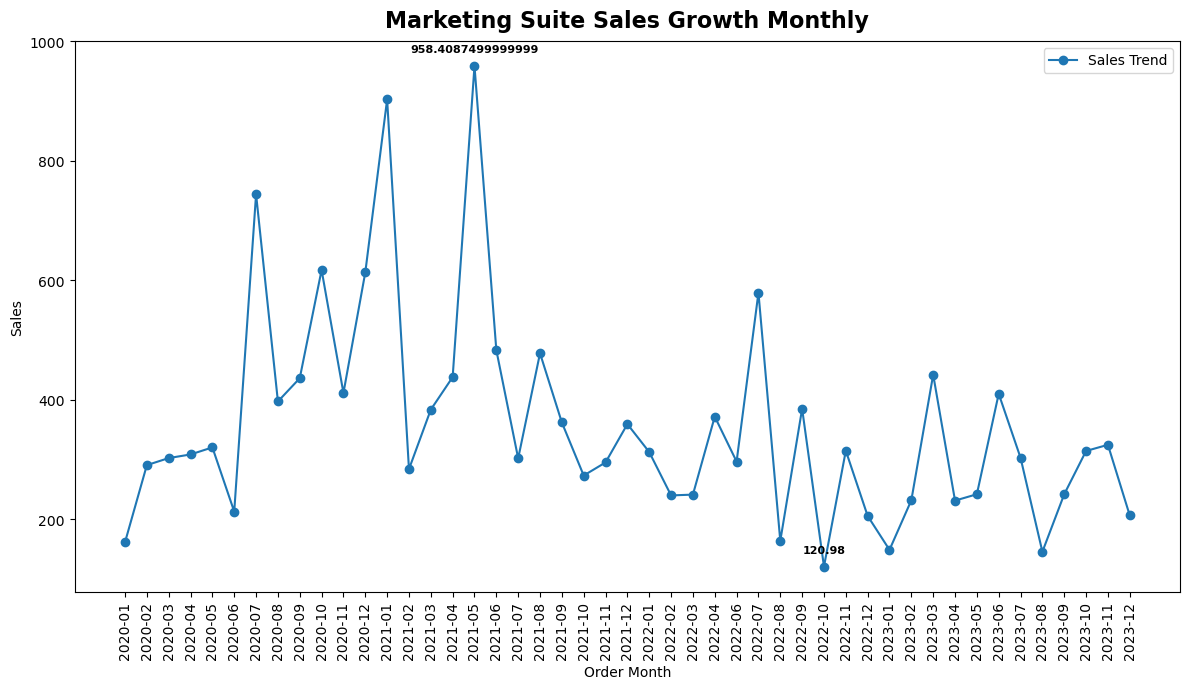

In [118]:
import matplotlib.pyplot as plt

# Mengonversi kolom 'Sales' menjadi string sebelum mengganti simbol '$'
df_sales['Sales'] = df_sales['Sales'].astype(str).str.replace('$', '')

# Mengonversi kolom 'Sales' menjadi float setelah mengganti simbol '$'
df_sales['Sales'] = df_sales['Sales'].astype(float)

# Membuat figure dengan ukuran yang ditentukan
plt.figure(figsize=(12, 7))

# Membuat line chart
plt.plot(df_sales['Order Month'].astype(str), df_sales['Sales'], marker='o', linestyle='-', label='Sales Trend')

# Mencari indeks nilai maksimum dan minimum
max_index = df_sales['Sales'].idxmax()
min_index = df_sales['Sales'].idxmin()

# Menambahkan anotasi untuk nilai maksimum dan minimum
plt.annotate(f"{df_sales['Sales'][max_index]}", 
             (df_sales['Order Month'].astype(str)[max_index], df_sales['Sales'][max_index]),
             textcoords="offset points", xytext=(0,10), ha='center', fontsize=8, fontweight='bold')
plt.annotate(f"{df_sales['Sales'][min_index]}", 
             (df_sales['Order Month'].astype(str)[min_index], df_sales['Sales'][min_index]),
             textcoords="offset points", xytext=(0,10), ha='center', fontsize=8, fontweight='bold')

# Menambahkan label sumbu x dan y, judul, rotasi label sumbu x, legenda, dan layout yang lebih rapat
plt.xlabel('Order Month')
plt.ylabel('Sales')
plt.title('Marketing Suite Sales Growth Monthly', size=16, pad=10, fontweight='bold')
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()

# Menampilkan grafik
plt.show()


#### Insight

1. Fluktuasi Penjualan: Angka penjualan fluktuatif secara signifikan sepanjang periode dari Januari 2020 hingga Desember 2023. Hal ini bisa disebabkan oleh berbagai faktor seperti tren musiman, kampanye pemasaran, atau perubahan kondisi pasar.

2. Puncak Penjualan: Angka penjualan tertinggi adalah $958.41, yang terjadi pada bulan Mei 2021. Hal ini bisa menandakan strategi penjualan yang berhasil atau musim belanja puncak.

3. Penjualan Terendah: Angka penjualan terendah adalah $120.98, yang terjadi pada bulan Oktober 2022. Hal ini bisa menunjukkan periode penjualan yang lambat atau perlunya peningkatan upaya pemasaran selama periode ini.

4. Tren Terbaru: Dalam beberapa bulan terakhir tahun 2023, penjualan cenderung stabil, dengan angka sebagian besar berkisar antara $200 hingga $400. Namun, terdapat penurunan yang mencolok pada bulan Agustus 2023, yang mungkin memerlukan investigasi lebih lanjut.

### Analisis Profit setiap bulan

In [119]:
df_profit = df_msuite.groupby("Order Month")[["Profit"]].median().reset_index()
display(df_profit.head())
display(df_profit.tail())


,Order Month,Profit
0,2020-01,-24.67810
1,2020-02,3.41960
2,2020-03,-12.09800
3,2020-04,-18.14700
4,2020-05,-94.81075


,Order Month,Profit
42,2023-08,-36.6744
43,2023-09,14.0980
44,2023-10,-14.4784
45,2023-11,-26.2801
46,2023-12,9.6585


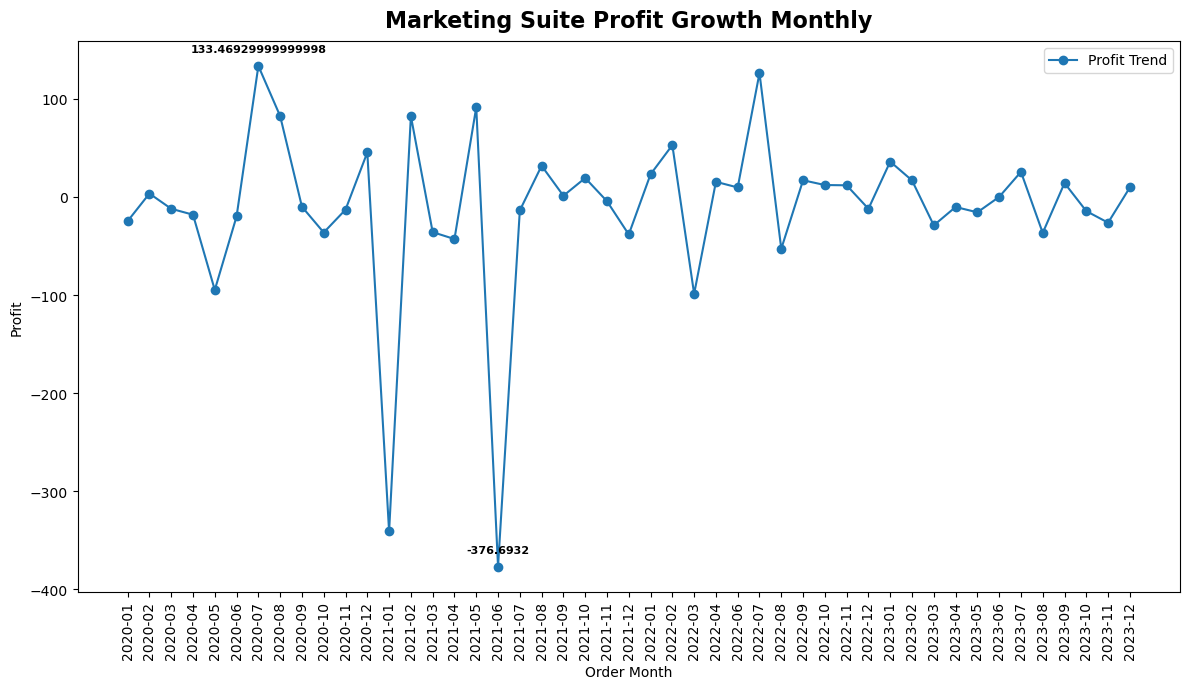

In [120]:
import matplotlib.pyplot as plt

# Membuat line chart
plt.figure(figsize=(12, 7))
plt.plot(df_profit['Order Month'].astype(str), df_profit['Profit'], marker='o', linestyle='-', label='Profit Trend')

# Mencari indeks nilai maksimum dan minimum
max_index = df_profit['Profit'].idxmax()
min_index = df_profit['Profit'].idxmin()

# Menambahkan anotasi untuk nilai maksimum dan minimum
plt.annotate(f"{df_profit['Profit'][max_index]}", 
             (df_profit['Order Month'].astype(str)[max_index], df_profit['Profit'][max_index]),
             textcoords="offset points", xytext=(0,10), ha='center', fontsize=8, fontweight='bold')
plt.annotate(f"{df_profit['Profit'][min_index]}", 
             (df_profit['Order Month'].astype(str)[min_index], df_profit['Profit'][min_index]),
             textcoords="offset points", xytext=(0,10), ha='center', fontsize=8, fontweight='bold')

# Menambahkan label sumbu x dan y, judul, rotasi label sumbu x, legenda, dan layout yang lebih rapat
plt.xlabel('Order Month')
plt.ylabel('Profit')
plt.title('Marketing Suite Profit Growth Monthly', size=16, pad=10, fontweight='bold')
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()

# Menampilkan grafik
plt.show()


#### Insight

1. Fluktuasi Profit: Angka profit fluktuatif secara signifikan sepanjang periode dari Januari 2020 hingga Desember 2023. Hal ini bisa disebabkan oleh berbagai faktor seperti perubahan dalam penjualan, biaya barang yang terjual, atau biaya lainnya.

2. Puncak Profit: Angka profit tertinggi adalah $133.47, yang terjadi pada bulan Juli 2020. Hal ini bisa menandakan strategi penjualan yang berhasil, pengurangan biaya, atau musim belanja puncak.

3. Profit Terendah: Angka profit terendah adalah kerugian sebesar $376.69, yang terjadi pada bulan Juni 2021. Hal ini bisa menunjukkan periode penjualan yang lambat, peningkatan biaya, atau perlunya peningkatan strategi bisnis selama periode ini.

4. Tren Terbaru: Dalam beberapa bulan terakhir tahun 2023, profit cenderung relatif stabil. Namun, terdapat penurunan yang mencolok pada bulan Agustus 2023, yang mungkin memerlukan investigasi lebih lanjut.

### Analisis Diskon Setiap Bulan 

In [121]:
df_discount = df_msuite.groupby("Order Month")[["Discount"]].median().reset_index()
df_discount['Discount'] = (df_discount['Discount'] * 100).apply(lambda x: f"{x:.2f}%")
display(df_discount.head())
display(df_discount.tail())

,Order Month,Discount
0,2020-01,32.50%
1,2020-02,15.00%
2,2020-03,15.00%
3,2020-04,15.00%
4,2020-05,32.50%


,Order Month,Discount
42,2023-08,30.00%
43,2023-09,15.00%
44,2023-10,15.00%
45,2023-11,20.00%
46,2023-12,17.50%


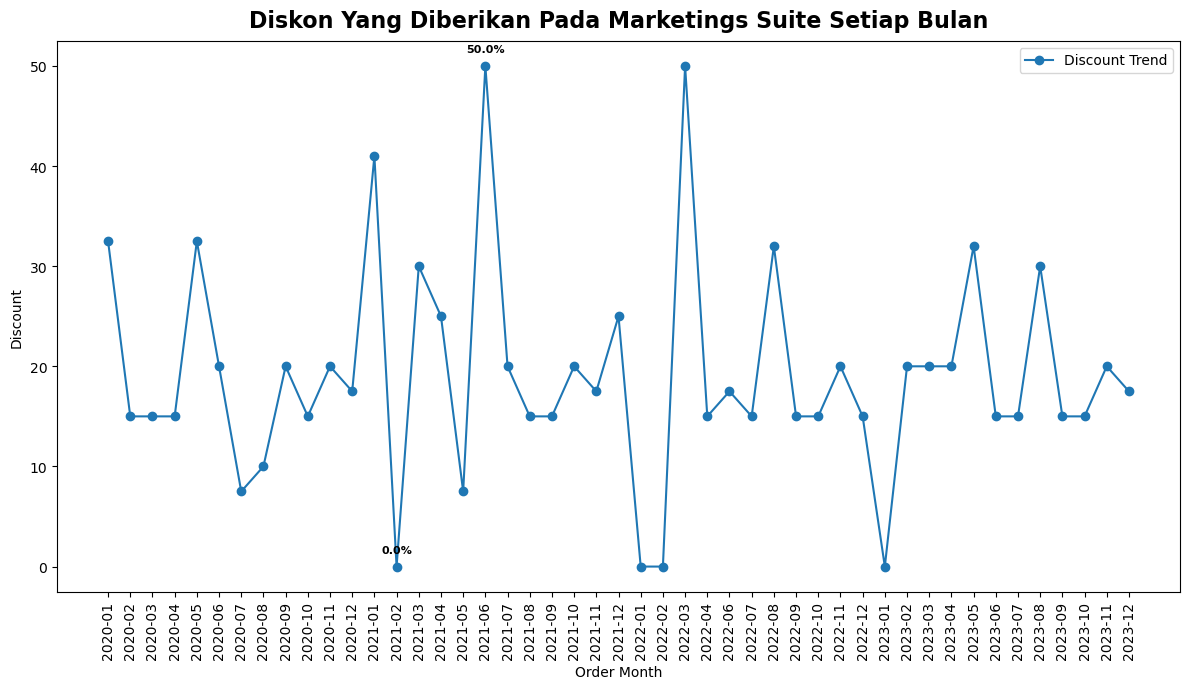

In [122]:
import matplotlib.pyplot as plt

# Mengonversi kolom 'Discount' menjadi string sebelum mengganti simbol '%'
df_discount['Discount'] = df_discount['Discount'].astype(str).str.replace('%', '')

# Mengonversi kolom 'Discount' menjadi float setelah mengganti simbol '%'
df_discount['Discount'] = df_discount['Discount'].astype(float)

# Membuat figure dengan ukuran yang ditentukan
plt.figure(figsize=(12, 7))

# Membuat line chart
plt.plot(df_discount['Order Month'].astype(str), df_discount['Discount'], marker='o', linestyle='-', label='Discount Trend')

# Mencari indeks nilai maksimum dan minimum
max_index = df_discount['Discount'].idxmax()
min_index = df_discount['Discount'].idxmin()

# Menambahkan anotasi untuk nilai maksimum dan minimum
plt.annotate(f"{df_discount['Discount'][max_index]}%", 
             (df_discount['Order Month'].astype(str)[max_index], df_discount['Discount'][max_index]),
             textcoords="offset points", xytext=(0,10), ha='center', fontsize=8, fontweight='bold')
plt.annotate(f"{df_discount['Discount'][min_index]}%", 
             (df_discount['Order Month'].astype(str)[min_index], df_discount['Discount'][min_index]),
             textcoords="offset points", xytext=(0,10), ha='center', fontsize=8, fontweight='bold')

# Menambahkan label sumbu x dan y, judul, rotasi label sumbu x, legenda, dan layout yang lebih rapat
plt.xlabel('Order Month')
plt.ylabel('Discount')
plt.title('Diskon Yang Diberikan Pada Marketings Suite Setiap Bulan', size=16, pad=10, fontweight='bold')
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()

# Menampilkan grafik
plt.show()


#### Insight 
1. Variasi dalam Diskon: Diskon yang diberikan bervariasi secara signifikan dari bulan ke bulan, dengan yang tertinggi mencapai 50.00% dan yang terendah adalah 0.00%. Tidak ada tren yang jelas dalam tingkat diskon; mereka fluktuatif dari bulan ke bulan. 
2. Tren Terbaru: Dalam beberapa bulan terakhir tahun 2023, diskon bervariasi dari 15.00% hingga 32.00%, kecuali pada bulan Januari 2023 di mana tidak ada diskon yang diberikan.


## Analisis Diskon Dengan Profit
analisis ini diharapakan untuk mengetahui apakah ada indikasi pengaruh besaran diskon dengan profit yang negatif

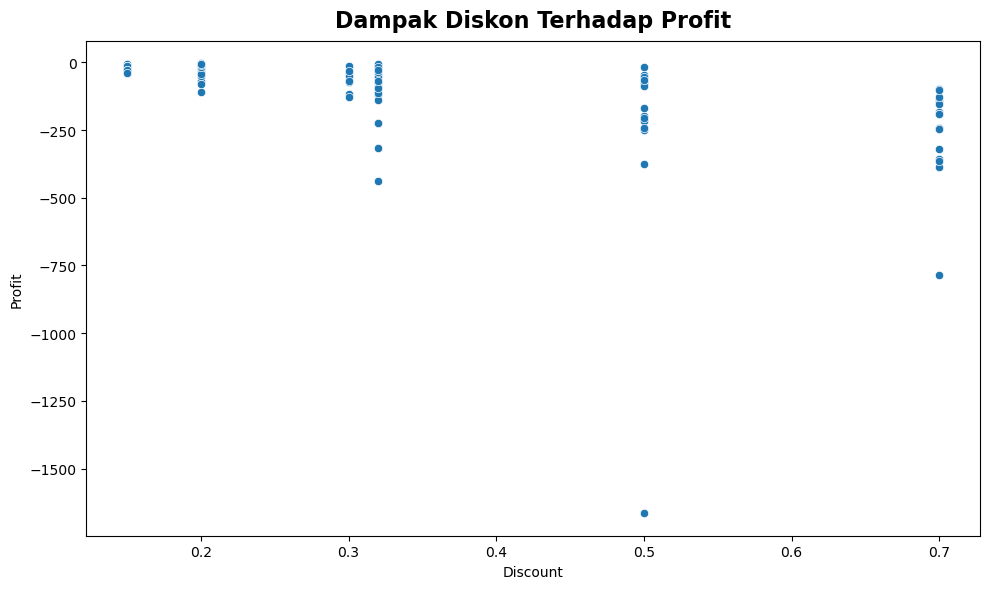

In [123]:
#melakukan filter untuk profit dibawah 0 (profit negatif)
negative_profit_products = df_msuite[df_msuite['Profit'] < 0]
#subplot
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plotting scatterplot
sns.scatterplot(x='Discount', y='Profit', data=negative_profit_products, ax=ax1)
ax1.set_title('Dampak Diskon Terhadap Profit', size=16, pad=10, fontweight='bold')
ax1.set_xlabel('Discount')
ax1.set_ylabel('Profit')

plt.tight_layout()
plt.show()


**INSIGHT** 

dalam scatter plot ddiatas nampak korelasi negatif antara diskon dan profitabilitas untuk produk Marketing Suite. Saat diskon meningkat, profitabilitas menurun. hal ini masih banyak yang harus di analisis lagi dari setiap element yang terhubung.




## Analisis Profit Marketing Suite di setiap Region


analisis ini untuk mengetahui lebih jau mengenai profit baik profit positif maupun profit negatif untuk Marketing Suite di setiap region yang ada. 

In [124]:
df_region = df_msuite.groupby('Region')['Profit'].sum().sort_values(ascending=False)
df_region.head()

Region
AMER      52.7756
EMEA   -1629.6682
APJ    -1895.6634
Name: Profit, dtype: float64

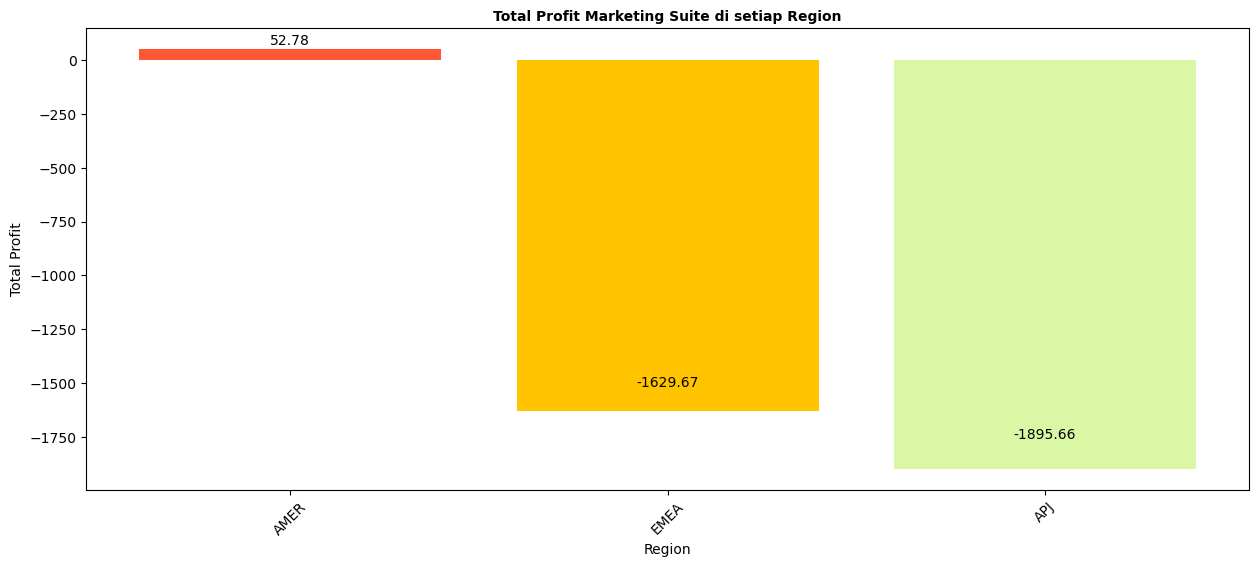

In [125]:
plt.figure(figsize=(15, 6))
# Plot setiap bar secara individu dengan warna yang diminta dan anotasi
colors = ["#FF5733", "#FFC300", "#DAF7A6"] 
for i, (index, value) in enumerate(df_region.head().items()):
    plt.bar(index, value, color=colors[i])  # Memberikan warna yang sesuai
    
    # Menyesuaikan posisi teks berdasarkan nilai tanda
    label = value + 0.1 * value if value >= 0 else value - 0.1 * value
    plt.text(i, label, f'{value:.2f}', ha='center', va='bottom' if value >= 0 else 'top')

plt.title('Total Profit Marketing Suite di setiap Region', size=10, pad=5, fontweight='bold')
plt.xlabel('Region')
plt.ylabel('Total Profit')
plt.xticks(rotation=45)
plt.show()


### Insight 
* AMER adalah satu-satunya Region yang memilik profit positif, dengan total keuntungan sebesar 52.78.
*  EMEA maupun APJ beroperasi dengan Profit Negatif, dengan total kerugian masing-masing sebesar -1629.67 dan -1895.66.
* APJ adalah Region dengan kerugian tertinggi, diikuti oleh EMEA.
* Terdapat perbedaan signifikan antara keuntungan AMER dan kerugian EMEA dan APJ.


dari data diatas , bisa dilihat bahwa produk ini menghasilkan profit positif di Region AMER. tetapi terdapat kesulitan di region EMEA dan APJ. untuk mengetahui lebih jauh akan dilihat juga masing masing sub regionnya. 


## Analisis Profit Marketing Suite di setiap Sub- Region

analisis ini adlaah analisis lanjutan untuk mengetahui lebih jau mengenai profit baik profit positif maupun profit negatif untuk Marketing Suite di setiap sub-region yang ada. 

In [126]:
df_Subregion = df_msuite.groupby('Subregion')['Profit'].sum().sort_values(ascending=True)
df_Subregion.head()

Subregion
EU-WEST   -3257.8735
JAPN      -2391.1377
EU-EAST   -2184.3301
LATAM     -1936.2213
ANZ        -555.8726
Name: Profit, dtype: float64

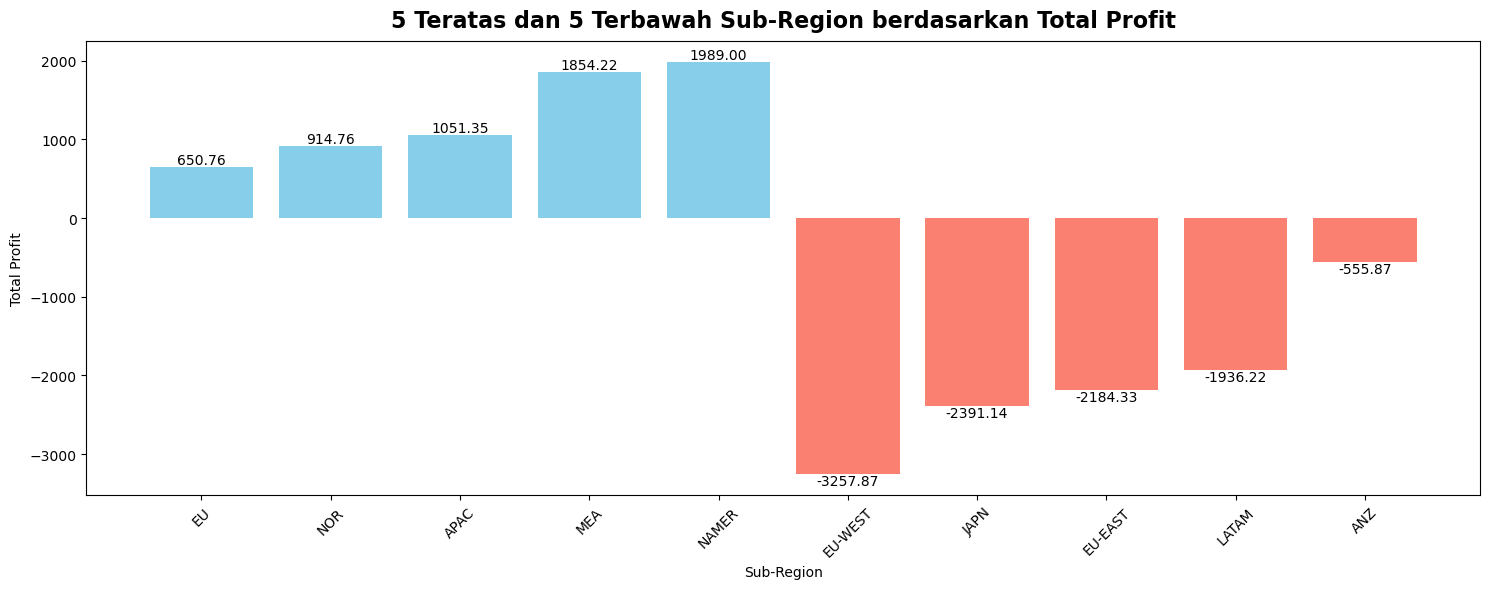

In [127]:

# Membagi menjadi 5 teratas dan 5 terbawah
top_5 = df_Subregion.tail(5)
bottom_5 = df_Subregion.head(5)

# Menggabungkan 5 teratas dan 5 terbawah untuk plotting
data_gabungan = pd.concat([top_5, bottom_5])

# Plot dengan warna yang berbeda untuk setiap batang dan penjelasan
plt.figure(figsize=(15, 6))

# Warna yang lebih menarik
colors = ['skyblue', 'skyblue', 'skyblue', 'skyblue', 'skyblue', 'salmon', 'salmon', 'salmon', 'salmon', 'salmon']

# Plot setiap batang secara individu dengan warna yang berbeda dan penjelasan
for i, (index, value) in enumerate(data_gabungan.items()):
    plt.bar(index, value, color=colors[i])
    
    # Menyesuaikan posisi teks untuk pusat penjelasan
    plt.text(i, value, f'{value:.2f}', ha='center', va='bottom' if value >= 0 else 'top')

plt.title('5 Teratas dan 5 Terbawah Sub-Region berdasarkan Total Profit', size=16, pad=10, fontweight='bold')
plt.xlabel('Sub-Region')
plt.ylabel('Total Profit')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


### Insight
* Sub-region yang menguntungkan adalah EU, NOR, APAC, MEA, dan NAMER dengan keuntungan masing-masing sebesar 650.76, 914.76, 1051.35, 1854.22, dan 1989.00.
* Sub-region yang tidak menguntungkan adalah NAMER, EUWEST, JPN, EUEAST, dan LATAM dengan kerugian masing-masing sebesar -3257.87, -2391.14, -2184.33, -1936.22, dan -555.87.
* NAMER adalah sub-region dengan keuntungan tertinggi, sedangkan EU-west adalah sub-region dengan kerugian tertinggi.

Dari data ini dapat disimpulkan bahwa Marketing Suite ini berjalan baik di Sub Regio EU, NOR, APAC, MEA dan NAMER , tetapi di EU-WEST , JAPN , EU-EAST, LATAM dan ANZ mendapat profit negatif. hal selanjutnya akan dilakukan pemetaan di setiap negara, untuk mengetahui negara mana yang memiliki total profit, dan apakah ada element yang berkesinambungan.

## Total Profit Marketing Suite di Setiap 'Country'

In [128]:
from geopy.geocoders import Nominatim
df_country = df.groupby('Country')['Profit'].sum().sort_values(ascending=True).reset_index()
# Inisialisasi objek geolokasi
geolocator = Nominatim(user_agent="geoapiExercises")

# Fungsi untuk mendapatkan latitude
def get_latitude(country):
    location = geolocator.geocode(country)
    if location:
        return location.latitude
    else:
        return None

# Fungsi untuk mendapatkan longitude
def get_longitude(country):
    location = geolocator.geocode(country)
    if location:
        return location.longitude
    else:
        return None

# Tambahkan kolom latitude
df_country['Latitude'] = df_country['Country'].apply(get_latitude)

# Tambahkan kolom longitude
df_country['Longitude'] = df_country['Country'].apply(get_longitude)

# Tampilkan DataFrame yang telah dimodifikasi
df_country


,Country,Profit,Latitude,Longitude
0,Japan,-25729.3563,36.574844,139.239418
1,Mexico,-16971.3766,19.432630,-99.133178
2,France,-15559.9603,46.603354,1.888334
3,Australia,-12607.8870,-24.776109,134.755000
4,Sweden,-7490.9122,59.674971,14.520858
5,Russia,-6527.8579,64.686314,97.745306
6,South Africa,-5341.6936,-28.816624,24.991639
7,Chile,-3427.9246,-31.761336,-71.318770
8,Germany,-3399.3017,51.163818,10.447831
9,Belgium,-1190.4705,50.640281,4.666715


In [129]:
import folium
from geopy.geocoders import Nominatim

# Inisialisasi DataFrame df_country
df_country = df.groupby('Country')['Profit'].sum().reset_index()

# Inisialisasi objek geolokasi
geolocator = Nominatim(user_agent="geoapiExercises")

# Fungsi untuk mendapatkan latitude
def get_latitude(country):
    location = geolocator.geocode(country)
    if location:
        return location.latitude
    else:
        return None

# Fungsi untuk mendapatkan longitude
def get_longitude(country):
    location = geolocator.geocode(country)
    if location:
        return location.longitude
    else:
        return None

# Tambahkan kolom latitude
df_country['Latitude'] = df_country['Country'].apply(get_latitude)

# Tambahkan kolom longitude
df_country['Longitude'] = df_country['Country'].apply(get_longitude)

# Buat peta menggunakan folium
m = folium.Map()

# Tambahkan markah untuk setiap negara
for index, row in df_country.iterrows():
    if not pd.isnull(row['Latitude']) and not pd.isnull(row['Longitude']):
        if row['Profit'] >= 0:
            color = 'green'  # profit positif, pin warna hijau
        else:
            color = 'red'  # profit negatif, pin warna merah
        folium.Marker([row['Latitude'], row['Longitude']], 
                      popup=row['Country'],
                      icon=folium.Icon(color=color)).add_to(m)

# Tampilkan peta
m



Country x Profit : 

* Negara dengan Keuntungan Negatif (Pin Merah):

    * France: -2896.7601
    * Russia: -2408.9163
    * Japan: -2391.1377
    * Mexico: -1359.0516
    * Chile: -869.2073
    * Belgium: -616.8158
    * Australia: -555.8726
    * Germany: -116.0706
    * Sweden: -97.9780
    * South Africa: -6.3236

* Negara dengan Keuntungan Positif (Pin Hijau):

    * Croatia: 39.7488
    * Israel: 41.1684
    * Ireland: 41.9136
    * Poland: 53.2350
    * Singapore: 54.7136
    * Czech Republic: 57.1928
    * China: 105.6054
    * Ukraine: 126.2250
    * Norway: 129.4762
    * Argentina: 141.3920
    * Brazil: 150.6456
    * United Arab Emirates: 172.4814
    * Turkey: 218.2624
    * Spain: 278.7892
    * United Kingdom: 350.8744
    * South Korea: 414.0936
    * Saudi Arabia: 456.6770
    * Philippines: 476.9343
    * Canada: 570.0054
    * Italy: 650.7630
    * Finland: 883.2620
    * Egypt: 1013.1270
    * United States: 1418.9915

### INSIGHT 
1. Negara dengan Profit Positif adalah Canada, El Sav, Finland, Egypt, dan the United States dengan keuntungan masing-masing sebesar 570.01, 650.76, 883.26, 1013.13, dan 1418.99.

2. Negara dengan Profit negatif adalah Chile, Mexico, Japan, Russia, France dengan kerugian masing-masing sebesar -869.21, -1359.05, -2408.92, -2391.14, dan -2896.

3. The United States memiliki profit tertinggi, sementara France memiliki Profit Negatif paling besar.

dari data ini kita dapat mengetahui bahwa produk Marketing Suite berkinerja baik di Canada, El Sav, Finland, Egypt, dan the United States tetapi mendapat profit negatif di di France, Russia, Japan, Mexico, dan Chile. Strategi di negara-negara ini mungkin perlu ditinjau kembali untuk meningkatkan kinerja.

## Analisis Segment di Marketing Suite

setelah mengetahui negara mana yang mendapat profit positif dan negatif di produk Marketing Suite, pada analisis ini bertujuan untuk mengatahui segment mana saja yang banyak digunakan customer.

In [130]:
proportion = df_msuite['Segment'].value_counts()/len(df)
proportion

Segment
SMB           0.013108
Strategic     0.006404
Enterprise    0.003302
Name: count, dtype: float64

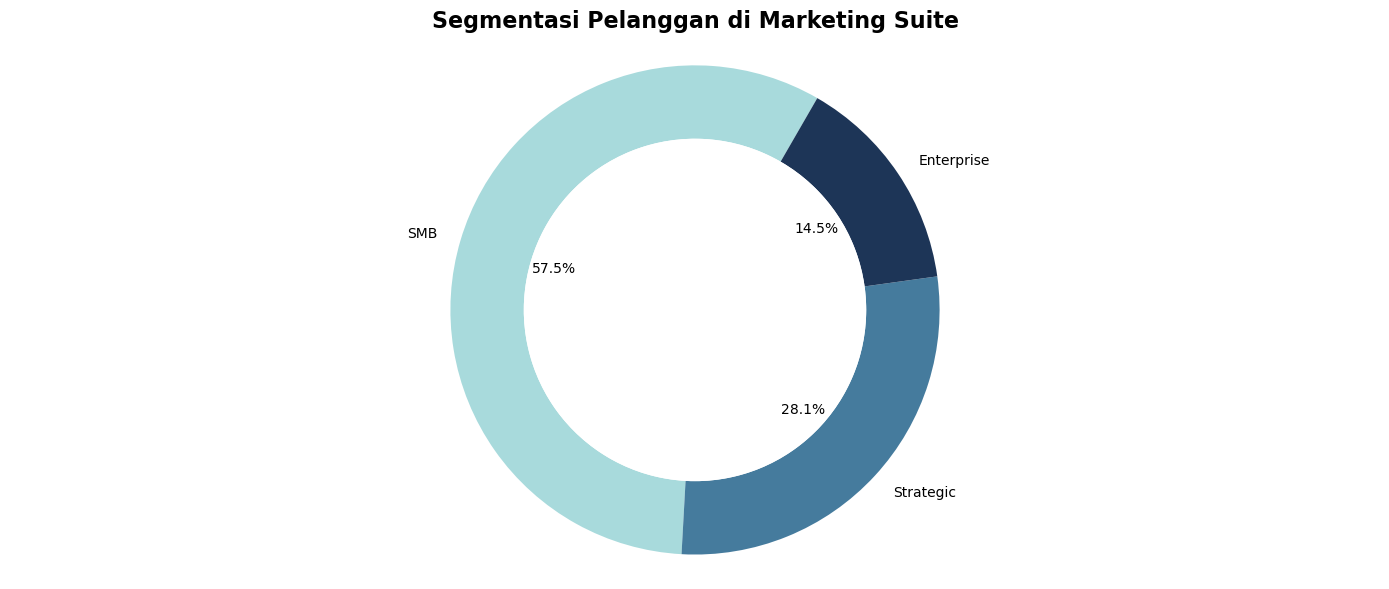

In [131]:
import matplotlib.pyplot as plt

# Data proporsi dan label
proportion_values = proportion.values
proportion_labels = proportion.index

# Warna kustom untuk diagram pie
colors = ['#A8DADC', '#457B9D', '#1D3557']  

# Membuat diagram pie
plt.figure(figsize=(14, 6))
plt.pie(proportion_values, labels=proportion_labels, autopct='%1.1f%%', startangle=60, colors=colors, wedgeprops=dict(width=0.3), textprops={'color': 'black'})
plt.axis('equal')  # Membuat diagram pie menjadi lingkaran
plt.title('Segmentasi Pelanggan di Marketing Suite', size=16, pad=10, fontweight='bold')

# Menambah lingkaran tengah putih
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.tight_layout()
plt.show()


### INSIGHT 
* SMB (Small and Medium-sized Businesses): Ini adalah segmen terbesar, menyumbang 57.5% dari total basis pelanggan.
* Strategis: Segmen ini mencakup 28.1% dari jumlah pelanggan.
* Enterprise: Ini adalah segmen terkecil, mencakup 14.5% dari total pelanggan.

Data ini dapat berguna untuk memahami basis pelanggan perusahaan dan membuat keputusan yang baik dalam strategi pemasaran sesuai. Sebagai contoh, karena SMB membentuk sebagian besar basis pelanggan, upaya pemasaran bisa dioptimalkan untuk lebih memenuhi kebutuhan segmen ini.


# Kesimpulan


Secara Konsisten Marketing Suites mengalami profitabilitas dengan trend negatif. dari keseluruhan produk di perusahaan khususnya di SaaS sales, marketing suite menjadi faktor berkurangnya profit. trend negatif yang terus konsisten merupakan tanda perlunya perhatian khusus dari perusahaan. dilihat dari analisis korelasi antar variabel secara numerik , ataupun dilihat dari analisis regional, sub regional , negara (country) secara konsisten terdapat trend negatif. hal ini menyatakan bahwa marketing suite menjadi produk yang mendapat banyak rintangan dari beberapa wilayah. berikut akan disimpulkan beberapa hasil temuan dan analisis pendukung bagi perusahaan : 

1. Jika kita melihat trend dari diskon dan Profit , Peningkatan diskon sangat berkolasi dengan penurunan profit. semakin tinggi diskon makan semakin turun profit. hal ini diperlukan strategi/peninjauan ulang dari tim bisnis/ marketing terkait penjualan marketing suites , optimalkan strategi diskon untuk mencapai keseimbangan antara meningkatkan penjualan dan mempertahankan margin keuntungan. Pertimbangkan penawaran diskon bertingkat atau penawaran bersyarat untuk mempertahankan profitabilitas.
2. Analisis Regional menunjukkan beberapa memilik profit positif di beberapa regional, tetapi di beberapa regional juga mengalami penurunan. hal ini diperlukan strategi unntuk mendukung kenaikan profit. hal ini bisa diketahui dari faktor lain lain yang harus diketahui, seperti faktor kebiasaan pasar, faktor budaya, dan lain lain. 
3. untuk mengetahui dan mendukung point no 2 , kami melakukan analisis lebih dalam dengan menganalisis sub region dan negara mana saja yang memiliki profitbilitas negatif dan positif. berfokus di negara, Top 3 negara dengan Profit negatif adalah Japan, Russia, France dengan kerugian masing-masing sebesar -2408.92, -2391.14, dan -2896 setelah melakukan beberapa pengumpulan data diluar melalui beberapa artikel   ternyata tedapat beberapa faktor ketiga negara tersebut memiliki kebiasaan pemasaran/marketing yang berbeda. seperti yang terdapat pada artikel  [Sistem Pemasaran ala Jepang](https://www.blj.co.id/2013/03/17/sistem-pemasaran-ala-jepang/) , Jepang memiliki kemampuan memasarkan produknya ke negara lain secara komersial. Sistem pemasaran yang efektif menjadi katalisator pertumbuhan ekonomi di negara tersebut. Jepang membuktikan mereka dapat menembus semua pasaran. Jepang yang mengedepankan Marketing secara konvensional melalui budaya walaupun hampir berjalan beriringan dengan digital, tapi Jepang selalu membuat strategi marketing dengan seperti membuat event event besar di beberapa bulan yang berbeda yang memancing rasa penasaran wisatawan. sedangkan france mengedepankan marketing dari sisi kreatifitas khususnya di bidang Fashion dengan kualitas yang sangat baik , penekanan pada seni & tradisi yang hal itu juga memancing rasa penasaran wisatawan/ pelanggan. walaupun beriringan dengan marketing digital tetapi startegi lainnya lebih memiliki faktor besar.
4. dengan mengetahui segmentasi kegunaan produk, kita bisa melihat adanya presentase besar di segment SMB (Small-Medium Business), hal ini bisa dimanfaatkan untuk merancang strategi penjualan dengan melakukan research apa yang menjadikan mereka membeli marketing suite. analisis lebih lanjut faktor-faktor yang menyebabkan kerugian di antara pelanggan tertentu bertujuan mengembangkan strategi yang ditargetkan untuk perbaikan atau jika diperlukan/dipertimbangkan untuk mengevaluasi ulang penjualan. 
5. Lakukan analisis manfaat produk dan biaya yang teliti terhadap produk Marketing Suite untuk memahami struktur biayanya dan nilai yang dirasakan. Hal ini akan membantu dalam menilai apakah strategi penetapan harga sejalan dengan harapan pelanggan dan kondisi pasar.